In [1]:
import csv
from os import listdir
from os.path import isfile, isdir, join,abspath
import os
import pandas as pd
import numpy as np
from numpy.testing import assert_almost_equal
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
mypath = "EMGdata/1212"# 指定要列出所有檔案的目錄
test=['24','27','73','75','120'] #檔案的數字編號
label=['pre', 'h1', 'h2','h3','h4','h5']
patient='lin1212'     #病人名稱，後面可加日期加以區分
folder=patient+'/'+patient  #要存放輸出結果的資料夾+病人名稱
le =  []              #病人在不同時段的levodopa值
U =  []               #病人在不同時段的UPDRS值
levodopa_on=False     #有無需要計算包含levodopa的相關矩陣
UPDRS_on=False        #有無需要計算包含UPDRS的相關矩陣

#name='lin'
testname='Test'       #檔案名稱裡包含數字編號前的字串
testorder=1           #在檔案名稱中的幾個順序裡有檔案數字


In [3]:
dir=(patient)  #EMG檔案的存放位置
if not os.path.exists(dir):
         os.mkdir(dir)

# 列出所有檔案

In [4]:
for filename in listdir(mypath):
    fullpath = join(mypath,filename)
    print(fullpath)

EMGdata/1212\20221212_Test120-10_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test120-1_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test120-2_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test120-3_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test120-4_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test120-5_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test120-6_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test120-7_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test120-8_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test120-9_Plot_and_Store_Rep_1.0.csv_Result.xlsx
EMGdata/1212\20221212_Test24-10_Plot_and_Store_Rep_1.22.csv_Result.xlsx
EMGdata/1212\20221212_Test24-1_Plot_and_Store_Rep_1.22.csv_Result.xlsx
EMGdata/1212\20221212_Test24-2_Plot_and_Store_Rep_1.22.csv_Result.xlsx
EMGdata/1212\20221212_Test24-3_Plot_and_Store_Rep_1.22.csv_Result.xlsx
EMGd

# 確認檔案數字有在檔案名稱裡

In [5]:
fullpath.split("_")[testorder]

'Test76-6'

In [6]:
df = pd.DataFrame()
 
data = pd.read_excel(fullpath, sheet_name=None)
 
sheet = pd.ExcelFile(fullpath)

# EMG檔案裡的指標名稱

In [7]:
sheet.sheet_names

['Ku', 'CD', 'PSD_3_to_7', 'PSD_12_to_30', 'PSD_20_to_40']

# 取得EMG資料裡１６個頻道的指標的函式

In [8]:
def getburst(data):
    burstduration=[]
    burstdurationsd=[]
    burstinterval=[]
    burstintervalsd=[]   
    df=data.get('Ku')
    Bi=[]
    Bd=[]
    for num in range(16):
        bd=[]
        bi=[]
        val1=0
        val2=0
        for i in range(len(df)):
            n=str(num+1)
            if(df['Off_'+n][i]!=0):
                val1+=1
                bd.append(df['Off_'+n][i]-df['On_'+n][i])   
            if((df['Off_'+n][i]!=0)and(i!=0)):
                bi.append(df['On_'+n][i]-df['Off_'+n][i-1]) 
                val2+=1
        if(val1==0):
            burstduration.append(0)
            burstdurationsd.append(0)
        else:
            burstduration.append(np.mean(bd))
            burstdurationsd.append(np.std(bd))
        if(val2==0):
            burstinterval.append(0)
            burstintervalsd.append(0)
        else:
            burstintervalsd.append(np.std(bi))
            burstinterval.append(np.mean(bi))
        Bi.append(bi)
        Bd.append(bd)
    return (burstduration,burstdurationsd,burstinterval,burstintervalsd,Bi,Bd)

In [9]:
def get_ku(data):
    Ku=[]
    df1=data.get('Ku')
    Kustd=[]   
    Kudata=[]
    for num in range(16):
        ku=[]  
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['Ku_'+n][i]!=0):
                val+=1
                ku.append(df1['Ku_'+n][i])
        if(val==0):
            Ku.append(0)
        else:
            Ku.append(np.mean(ku))
            Kustd.append(np.std(ku))
        Kudata.append(ku)
    return(Ku,Kustd,Kudata)

In [10]:
def get_corr(data):
    CorrDim=[]
    CorrDimstd=[]
    df1=data.get('CD')   
    corrdata=[]
    for num in range(16):
        cd=[]
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['CD_'+n][i]!=0):
                val+=1
                cd.append(df1['CD_'+n][i])
        if(val==0):
            CorrDim.append(0)
        else:
            CorrDim.append(np.mean(cd))
            CorrDimstd.append(np.std(cd))
        corrdata.append(cd)
    return(CorrDim,CorrDimstd,corrdata)

In [11]:
def get_PSD_3_to_7(data):
    PSD_3_to_7=[]
    df1=data.get('PSD_3_to_7')   
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_3_to_7.append(psd/val)
    return(PSD_3_to_7)

In [12]:
def get_PSD_12_to_30(data):
    PSD_12_to_30=[]
    df1=data.get('PSD_12_to_30')   
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_12_to_30.append(psd/val)
    return(PSD_12_to_30)

In [13]:
def get_PSD_20_to_40(data):
    PSD_20_to_40=[]
    df1=data.get('PSD_20_to_40')    
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_20_to_40.append(psd/val)
    return(PSD_20_to_40)

In [14]:
def getData(fullpath):
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    
    #may change
    Data= pd.DataFrame({'test': [patient+'_'+fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'kurtosis_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_3_to_7[i]],'PSD_12_to_30_'+n: [PSD_12_to_30[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        Data=pd.concat([Data, rows], axis=1)
    Data.set_index("test" , inplace=True)    
    return Data

# 檢視資料

In [15]:
Data= pd.DataFrame()

for filename in listdir(mypath):
    fullpath = join(mypath,filename)
    data=getData(fullpath)
    Data=pd.concat([Data, data], axis=0)

In [16]:
 Data

burstduration_1  burstinterval_1  kurtosis_1  CorrDim_1  \
test                                                                          
lin1212_Test120-10         0.476500         0.599000    7.947538   1.980871   
lin1212_Test120-1          0.564418         0.375686    7.630193   1.854861   
lin1212_Test120-2          0.507670         0.498527    9.509989   1.862400   
lin1212_Test120-3          1.264691         0.519587    8.293755   1.898427   
lin1212_Test120-4          0.777639         0.548917    8.526902   1.905176   
lin1212_Test120-5          1.226190         0.455839    8.135976   1.911395   
lin1212_Test120-6          0.403125         0.531833    8.279510   1.907166   
lin1212_Test120-7          0.408222         0.503550    6.042082   1.956781   
lin1212_Test120-8          0.445612         0.577239    8.805054   1.983830   
lin1212_Test120-9          1.121661         0.519510    6.144127   1.954229   
lin1212_Test24-10          0.433667         0.429200    6.511529   1.930296   
lin1212_Test24-1           0.565471         0.494020    4.159088   1.853821   
lin1212_Test24-2           1.446178         0.343820    5.369195   1.886951   
lin1212_Test24-3           0.724835         0.474779    7.153515   1.909888   
lin1212_Test24-4           0.630676         0.494218    5.791680   1.856512   
lin1212_Test24-5           0.912983         0.606790    4.950707   1.980639   
lin1212_Test24-6           0.893786         0.442187    7.866923   1.981890   
lin1212_Test24-7           0.638444         0.464432    7.217511   1.896132   
lin1212_Test24-8           0.631387         0.553027    6.721844   2.052960   
lin1212_Test24-9           0.438776         0.590936    4.129354   1.875699   
lin1212_Test27-10          0.414125         0.411444    5.657978   1.929731   
lin1212_Test27-1           0.479898         0.412848    4.354086   1.887125   
lin1212_Test27-2           0.451898         0.399281    4.830591   1.832112   
lin1212_Test27-3           0.568903         0.360143    3.579086   1.974229   
lin1212_Test27-4           0.861735         0.483036    5.424220   1.851719   
lin1212_Test27-5           0.377899         0.587718    6.609392   1.876980   
lin1212_Test27-6           0.430938         0.578639    5.434454   1.889814   
lin1212_Test27-7           0.325552         0.571086    5.283827   1.907894   
lin1212_Test27-8           0.515940         0.599280    5.270278   1.971952   
lin1212_Test27-9           0.548107         0.383492    5.517622   1.790163   
lin1212_Test73-10          0.697111         0.316000    6.090668   1.963057   
lin1212_Test73-1           0.280499         0.637120    9.017401   1.911383   
lin1212_Test73-2           0.696958         0.354019    5.954924   1.896095   
lin1212_Test73-3           0.581309         0.365965    8.459096   1.930103   
lin1212_Test73-4           0.261901         0.602921   10.239652   1.921571   
lin1212_Test73-5           0.305889         0.586850   12.405682   1.887988   
lin1212_Test73-7           0.374750         0.513364    8.546556   1.909697   
lin1212_Test73-8           0.561500         0.447350   10.657218   1.855947   
lin1212_Test73-9           0.647938         0.387833    7.114624   1.965722   
lin1212_Test75-10          0.683485         0.392759    7.604088   1.889175   
lin1212_Test75-1           0.506038         0.439366    5.814963   1.841383   
lin1212_Test75-2           0.410034         0.547602    8.493393   1.825006   
lin1212_Test75-3           0.528991         0.440747    5.043159   1.830602   
lin1212_Test75-4           0.619558         0.418061    6.437571   1.865707   
lin1212_Test75-5           0.464399         0.453980    6.291902   1.820504   
lin1212_Test75-6           0.751040         0.330271    5.976729   1.919618   
lin1212_Test75-7           0.267934         0.618991    6.006682   1.851118   
lin1212_Test75-8           0.183242         0.688617    9.632121   1.870198   
lin1212_Test75-9           0.595738         0.523876    4.391410   1.9

# 將每一channel的指標存到陣列裡的函式

In [17]:
def getsepData(fullpath):
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_3_to_7[i]],'PSD_12_to_30_'+n: [PSD_12_to_30[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)   
    return SepData

# 頻域的指標

In [18]:
def getsepDatafreq(fullpath):
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
    return SepData

# 時域的指標

In [19]:
def getsepDatatime(fullpath):
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    #
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] }
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
  
    return SepData

# 加入血液濃度或UPDRS

In [20]:
def getcorData(fullpath):
    for i in range(len(test)):
        #may change
        if((testname+test[i]) in fullpath.split("_")[testorder]):
            if(levodopa_on&UPDRS_on):
                UPDRS=U[i]   
                levodopa=le[i]  
            elif(levodopa_on&(not UPDRS_on)): 
                levodopa=le[i] 
            elif((not levodopa_on)&UPDRS_on): 
                UPDRS=U[i]   
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        if(levodopa_on&UPDRS_on):
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'levodopa_'+n:levodopa,'UPDRS_'+n:UPDRS}
        elif(levodopa_on&(not UPDRS_on)):    
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'levodopa_'+n:levodopa}
        elif((not levodopa_on)&UPDRS_on):    
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'UPDRS_'+n:UPDRS}
        else:
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
    return SepData

# 做出correlation matrix 

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


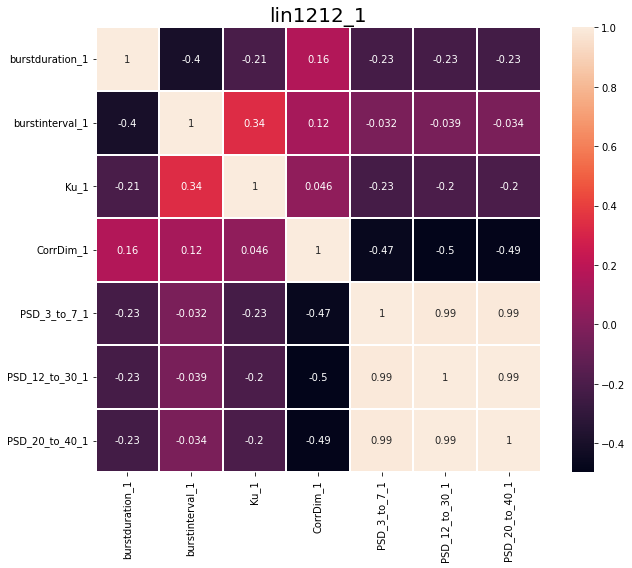

<Figure size 432x288 with 0 Axes>

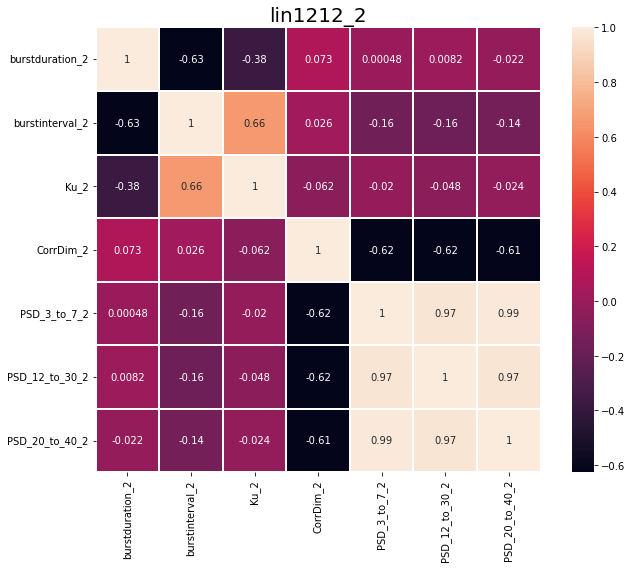

<Figure size 432x288 with 0 Axes>

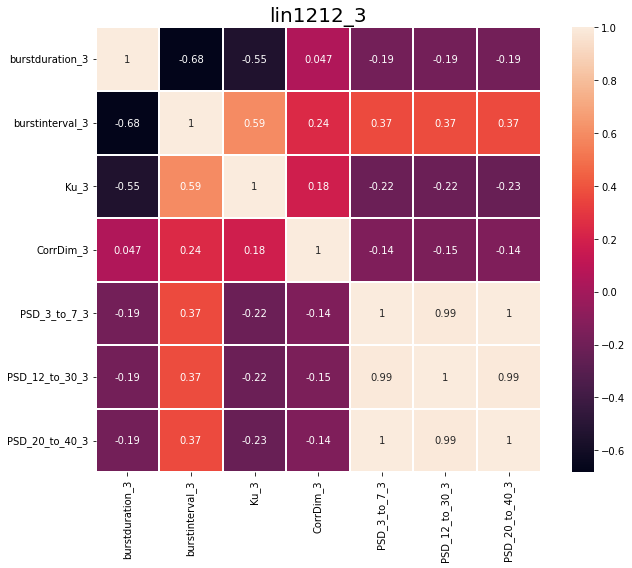

<Figure size 432x288 with 0 Axes>

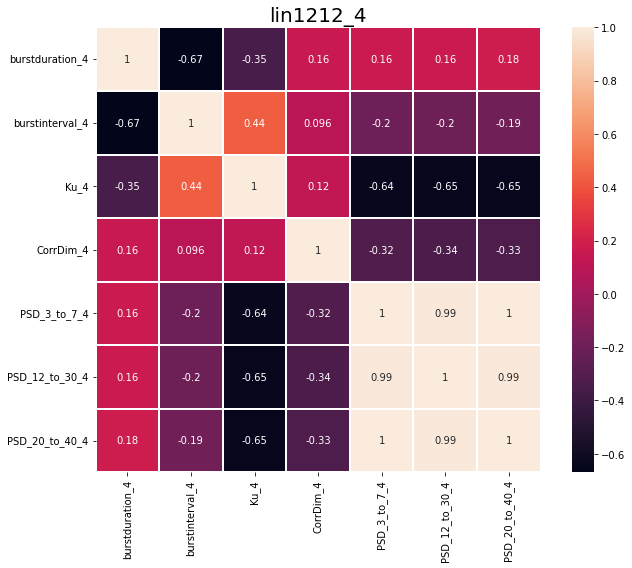

<Figure size 432x288 with 0 Axes>

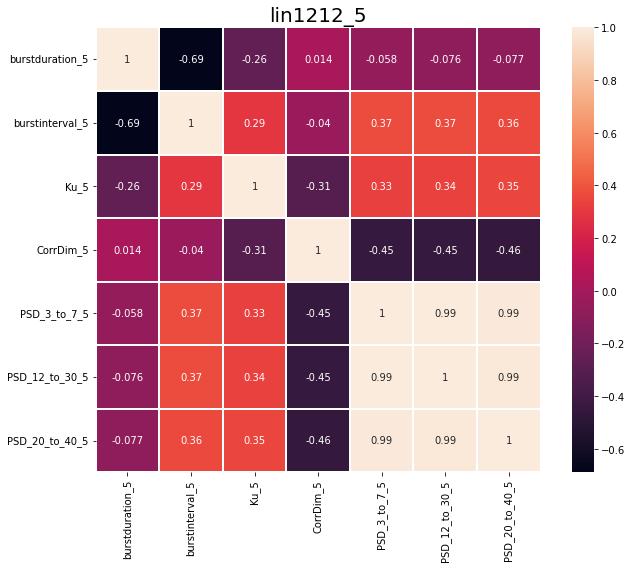

<Figure size 432x288 with 0 Axes>

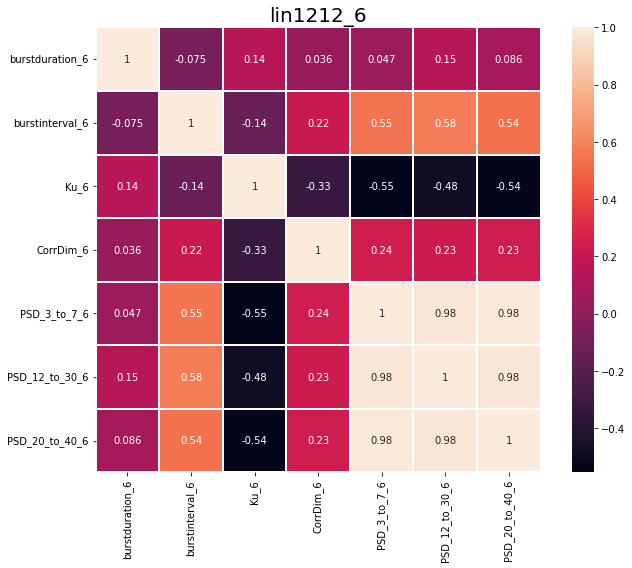

<Figure size 432x288 with 0 Axes>

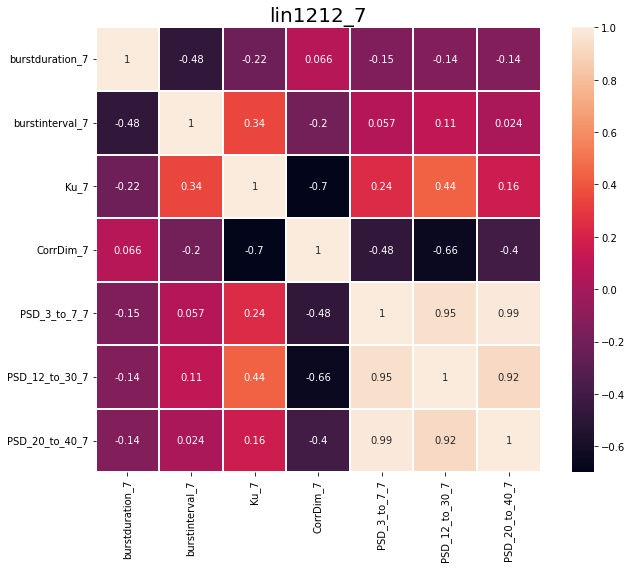

<Figure size 432x288 with 0 Axes>

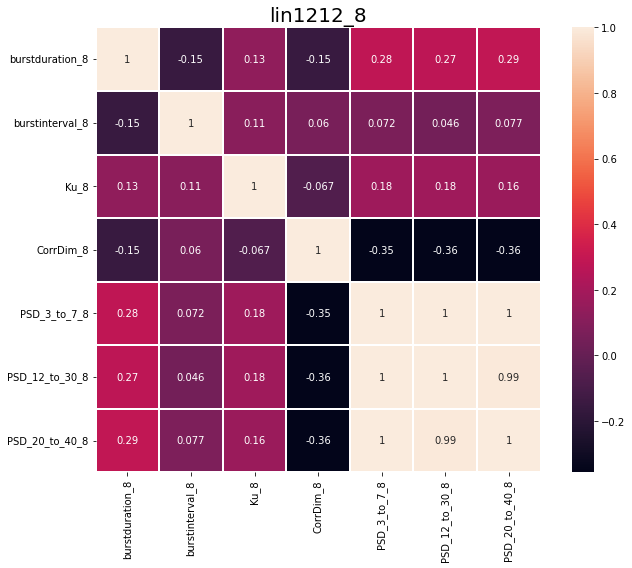

<Figure size 432x288 with 0 Axes>

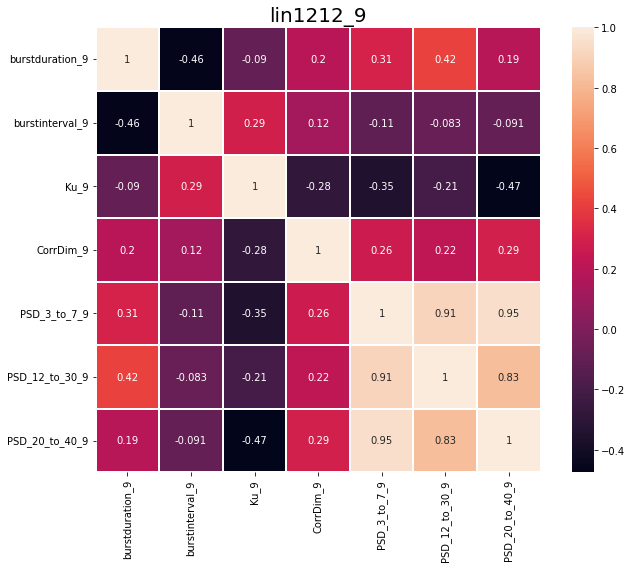

<Figure size 432x288 with 0 Axes>

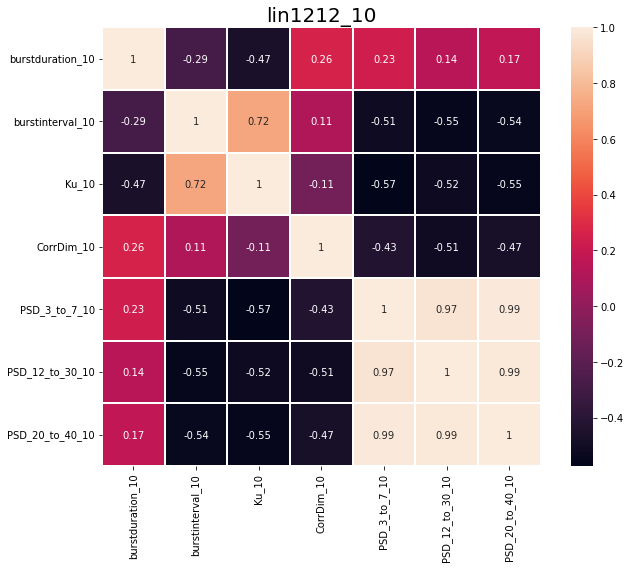

<Figure size 432x288 with 0 Axes>

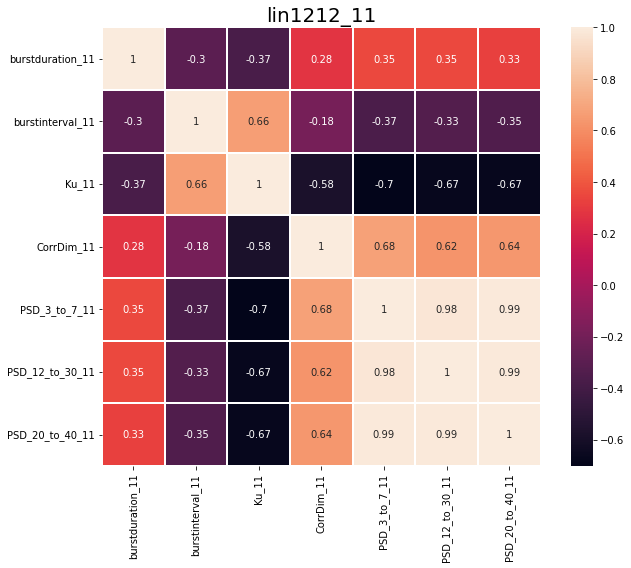

<Figure size 432x288 with 0 Axes>

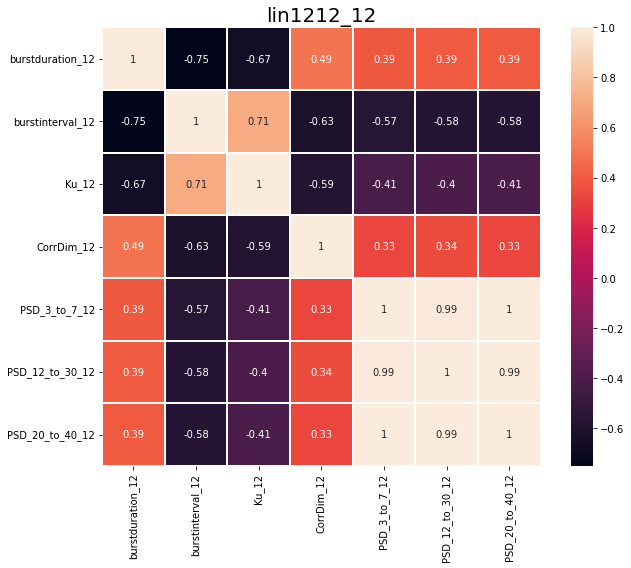

<Figure size 432x288 with 0 Axes>

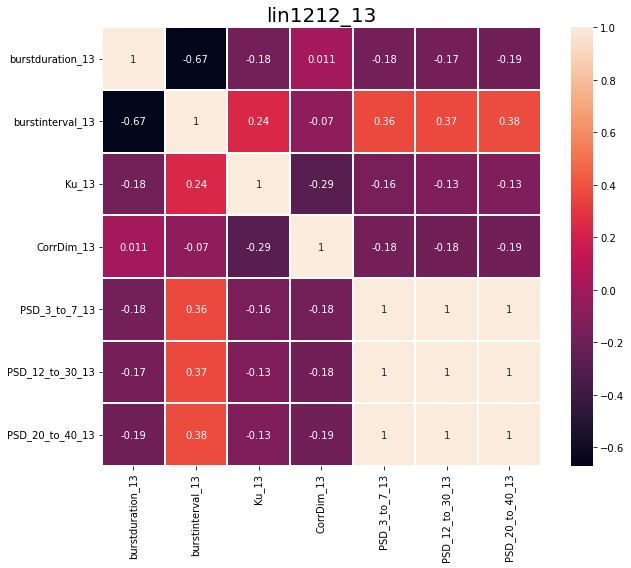

<Figure size 432x288 with 0 Axes>

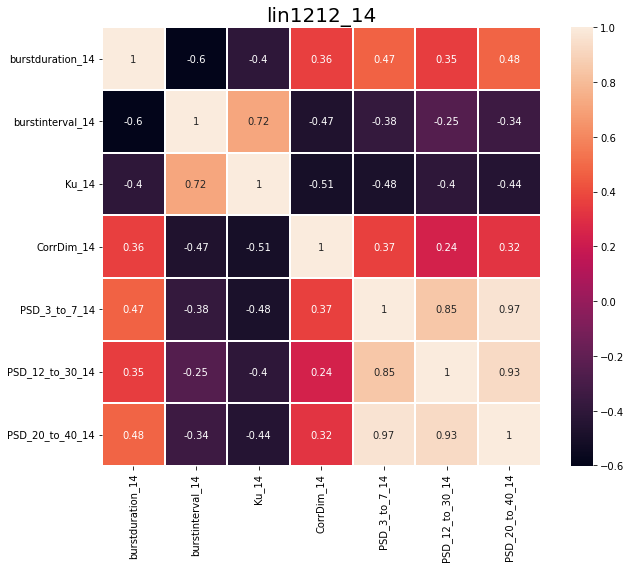

<Figure size 432x288 with 0 Axes>

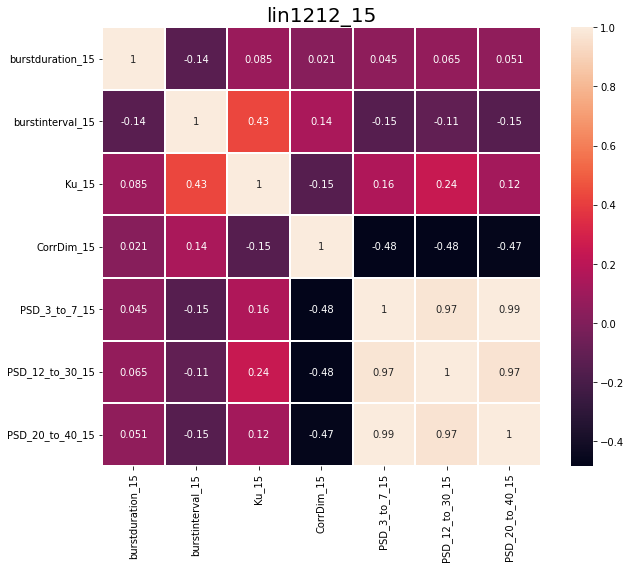

<Figure size 432x288 with 0 Axes>

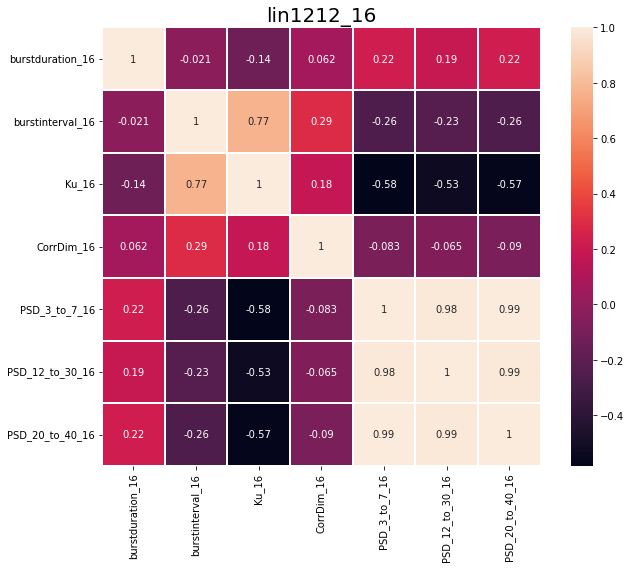

<Figure size 432x288 with 0 Axes>

In [21]:
D=[]

for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getcorData(fullpath))
for i in range(16):
    Data= pd.DataFrame()
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)
    corr_matrix = Data.corr()
    corr_matrix.to_csv(folder+'_'+str(i+1)+'.csv')
    plt.figure(figsize = (10,8))
    swarm_plot=sns.heatmap(corr_matrix,linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)
    fig = swarm_plot.get_figure()
    plt.title(patient+'_'+str(i+1), fontsize =20)
    fig.tight_layout()
    fig.savefig(folder+'_'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()
    
    

# PCA

In [22]:
df= pd.DataFrame()

for filename in listdir(mypath):
    fullpath = join(mypath,filename)
    data=getData(fullpath)
    df=pd.concat([df, data], axis=0)

In [23]:
df

burstduration_1  burstinterval_1  kurtosis_1  CorrDim_1  \
test                                                                          
lin1212_Test120-10         0.476500         0.599000    7.947538   1.980871   
lin1212_Test120-1          0.564418         0.375686    7.630193   1.854861   
lin1212_Test120-2          0.507670         0.498527    9.509989   1.862400   
lin1212_Test120-3          1.264691         0.519587    8.293755   1.898427   
lin1212_Test120-4          0.777639         0.548917    8.526902   1.905176   
lin1212_Test120-5          1.226190         0.455839    8.135976   1.911395   
lin1212_Test120-6          0.403125         0.531833    8.279510   1.907166   
lin1212_Test120-7          0.408222         0.503550    6.042082   1.956781   
lin1212_Test120-8          0.445612         0.577239    8.805054   1.983830   
lin1212_Test120-9          1.121661         0.519510    6.144127   1.954229   
lin1212_Test24-10          0.433667         0.429200    6.511529   1.930296   
lin1212_Test24-1           0.565471         0.494020    4.159088   1.853821   
lin1212_Test24-2           1.446178         0.343820    5.369195   1.886951   
lin1212_Test24-3           0.724835         0.474779    7.153515   1.909888   
lin1212_Test24-4           0.630676         0.494218    5.791680   1.856512   
lin1212_Test24-5           0.912983         0.606790    4.950707   1.980639   
lin1212_Test24-6           0.893786         0.442187    7.866923   1.981890   
lin1212_Test24-7           0.638444         0.464432    7.217511   1.896132   
lin1212_Test24-8           0.631387         0.553027    6.721844   2.052960   
lin1212_Test24-9           0.438776         0.590936    4.129354   1.875699   
lin1212_Test27-10          0.414125         0.411444    5.657978   1.929731   
lin1212_Test27-1           0.479898         0.412848    4.354086   1.887125   
lin1212_Test27-2           0.451898         0.399281    4.830591   1.832112   
lin1212_Test27-3           0.568903         0.360143    3.579086   1.974229   
lin1212_Test27-4           0.861735         0.483036    5.424220   1.851719   
lin1212_Test27-5           0.377899         0.587718    6.609392   1.876980   
lin1212_Test27-6           0.430938         0.578639    5.434454   1.889814   
lin1212_Test27-7           0.325552         0.571086    5.283827   1.907894   
lin1212_Test27-8           0.515940         0.599280    5.270278   1.971952   
lin1212_Test27-9           0.548107         0.383492    5.517622   1.790163   
lin1212_Test73-10          0.697111         0.316000    6.090668   1.963057   
lin1212_Test73-1           0.280499         0.637120    9.017401   1.911383   
lin1212_Test73-2           0.696958         0.354019    5.954924   1.896095   
lin1212_Test73-3           0.581309         0.365965    8.459096   1.930103   
lin1212_Test73-4           0.261901         0.602921   10.239652   1.921571   
lin1212_Test73-5           0.305889         0.586850   12.405682   1.887988   
lin1212_Test73-7           0.374750         0.513364    8.546556   1.909697   
lin1212_Test73-8           0.561500         0.447350   10.657218   1.855947   
lin1212_Test73-9           0.647938         0.387833    7.114624   1.965722   
lin1212_Test75-10          0.683485         0.392759    7.604088   1.889175   
lin1212_Test75-1           0.506038         0.439366    5.814963   1.841383   
lin1212_Test75-2           0.410034         0.547602    8.493393   1.825006   
lin1212_Test75-3           0.528991         0.440747    5.043159   1.830602   
lin1212_Test75-4           0.619558         0.418061    6.437571   1.865707   
lin1212_Test75-5           0.464399         0.453980    6.291902   1.820504   
lin1212_Test75-6           0.751040         0.330271    5.976729   1.919618   
lin1212_Test75-7           0.267934         0.618991    6.006682   1.851118   
lin1212_Test75-8           0.183242         0.688617    9.632121   1.870198   
lin1212_Test75-9           0.595738         0.523876    4.391410   1.9

In [24]:
# 使用 scikit-learn 內建的 API 正規化
scaler = StandardScaler()
Z= scaler.fit_transform(df)  # 注意維度

In [25]:
df.iloc[:, :] = Z

# 印出正規化後的資料

In [26]:
df.head()

burstduration_1  burstinterval_1  kurtosis_1  CorrDim_1  \
test                                                                          
lin1212_Test120-10        -0.414875         1.193339    0.477451   1.506616   
lin1212_Test120-1         -0.076336        -1.240114    0.322475  -0.923057   
lin1212_Test120-2         -0.294850         0.098480    1.240477  -0.777702   
lin1212_Test120-3          2.620165         0.327980    0.646527  -0.083040   
lin1212_Test120-4          0.744703         0.647588    0.760385   0.047097   

                    PSD_3_to_7_1  PSD_12_to_30_1  PSD_20_to_40_1  \
test                                                               
lin1212_Test120-10     -0.622573       -0.645656       -0.625957   
lin1212_Test120-1      -0.623761       -0.646604       -0.628340   
lin1212_Test120-2      -0.623414       -0.646189       -0.627219   
lin1212_Test120-3      -0.623820       -0.647828       -0.628699   
lin1212_Test120-4      -0.621512       -0.645128       -0.626543   

                    burstduration_2  burstinterval_2  kurtosis_2  ...  \
test                                                              ...   
lin1212_Test120-10        -0.726165         0.516319    0.952957  ...   
lin1212_Test120-1          3.900660        -1.479756   -0.316533  ...   
lin1212_Test120-2          0.192505        -0.520419   -0.478502  ...   
lin1212_Test120-3         -0.357341         0.867842    0.965746  ...   
lin1212_Test120-4         -0.766083         0.657704    1.673328  ...   

                    PSD_3_to_7_15  PSD_12_to_30_15  PSD_20_to_40_15  \
test                                                                  
lin1212_Test120-10      -0.725390        -0.707274        -0.684116   
lin1212_Test120-1       -0.664347        -0.685175        -0.662481   
lin1212_Test120-2       -0.705119        -0.678945        -0.661866   
lin1212_Test120-3       -0.729875        -0.689386        -0.667243   
lin1212_Test120-4       -0.706182        -0.687994        -0.659844   

                    burstduration_16  burstinterval_16  kurtosis_16  \
test                                                                  
lin1212_Test120-10         -0.909652         -0.307924     0.066898   
lin1212_Test120-1           0.241235          0.071200     0.206726   
lin1212_Test120-2          -0.336290          0.458941     0.817362   
lin1212_Test120-3          -0.133947         -0.103694    -0.094712   
lin1212_Test120-4          -0.648203         -0.897006     0.221797   

                    CorrDim_16  PSD_3_to_7_16  PSD_12_to_30_16  \
test                                                             
lin1212_Test120-10    0.018872      -0.648197        -0.797337   
lin1212_Test120-1    -1.806678      -0.660825        -0.822847   
lin1212_Test120-2     1.449594      -0.661562        -0.781989   
lin1212_Test120-3    -0.538120      -0.605016        -0.760975   
lin1212_Test120-4     0.734436      -0.655546        -0.781314   

                    PSD_20_to_40_16  
test                                 
lin1212_Test120-10        -0.796620  
lin1212_Test120-1         -0.788717  
lin1212_Test120-2         -0.780064  
lin1212_Test120-3         -0.795999  
lin1212_Test120-4         -0.795073  

[5 rows x 112 columns]

In [27]:
df_stats = df.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

In [28]:
df.index

Index(['lin1212_Test120-10', 'lin1212_Test120-1', 'lin1212_Test120-2',
       'lin1212_Test120-3', 'lin1212_Test120-4', 'lin1212_Test120-5',
       'lin1212_Test120-6', 'lin1212_Test120-7', 'lin1212_Test120-8',
       'lin1212_Test120-9', 'lin1212_Test24-10', 'lin1212_Test24-1',
       'lin1212_Test24-2', 'lin1212_Test24-3', 'lin1212_Test24-4',
       'lin1212_Test24-5', 'lin1212_Test24-6', 'lin1212_Test24-7',
       'lin1212_Test24-8', 'lin1212_Test24-9', 'lin1212_Test27-10',
       'lin1212_Test27-1', 'lin1212_Test27-2', 'lin1212_Test27-3',
       'lin1212_Test27-4', 'lin1212_Test27-5', 'lin1212_Test27-6',
       'lin1212_Test27-7', 'lin1212_Test27-8', 'lin1212_Test27-9',
       'lin1212_Test73-10', 'lin1212_Test73-1', 'lin1212_Test73-2',
       'lin1212_Test73-3', 'lin1212_Test73-4', 'lin1212_Test73-5',
       'lin1212_Test73-7', 'lin1212_Test73-8', 'lin1212_Test73-9',
       'lin1212_Test75-10', 'lin1212_Test75-1', 'lin1212_Test75-2',
       'lin1212_Test75-3', 'lin1212_Test75-4', 

# 取得按照時間順序排列的資料

In [29]:
lo=[]
for j in range(len(test)):
    lo.append([])
for i in range(len(df.index)):    
    for j in range(len(test)):
            if((testname+test[j]) in df.index[i]):
                    lo[j].append(i)


In [30]:
lo

[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38],
 [39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

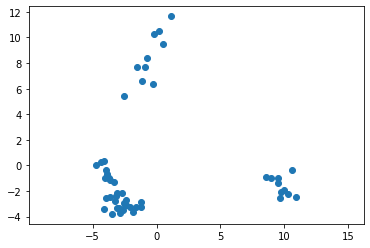

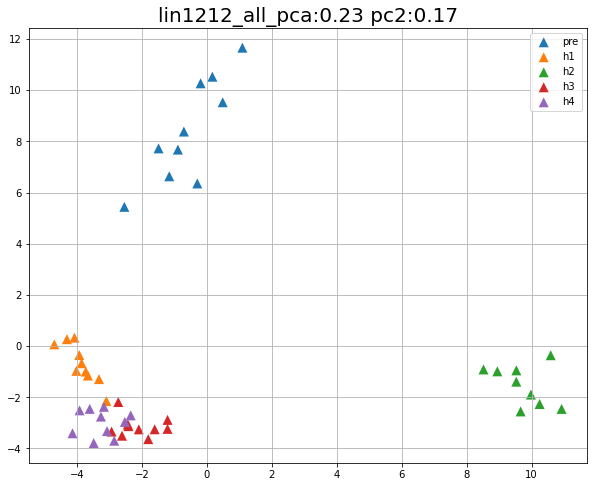

<Figure size 432x288 with 0 Axes>

In [31]:
"""
透過 scikit-learn 將數據降到 2 維
"""
# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)

# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)

# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal');
# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸，依照不同時間段資料點顏色不同
fig, ax = plt.subplots(figsize=(10,8))

for i in range(len(lo)):
    ax.scatter(L[lo[i],0], L[lo[i],1], label=label[i],marker ="^",
                edgecolors='none',s=100)

eig=np.round(pca.explained_variance_ratio_, 2)

plt.title(patient+'_all_pca:'+str(eig[0])+' pc2:'+str(eig[1]), fontsize =20)

ax.legend()
ax.grid(True)

plt.show()
fig.savefig(folder+'_all_pca'+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
plt.figure().clear()

In [32]:
"""
解析數據的前兩大主成份所代表的意涵。
顏色越突出代表其絕對值越大
"""
pcs = np.array(pca.components_) # (n_comp, n_features)

df_pc = pd.DataFrame(pcs, columns=df.columns[:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None)\
    .format("{:.2}")
df_pc.to_csv(folder+'_pc_all'+'.csv', index=False)

# 每一頻道全部指標的PCA

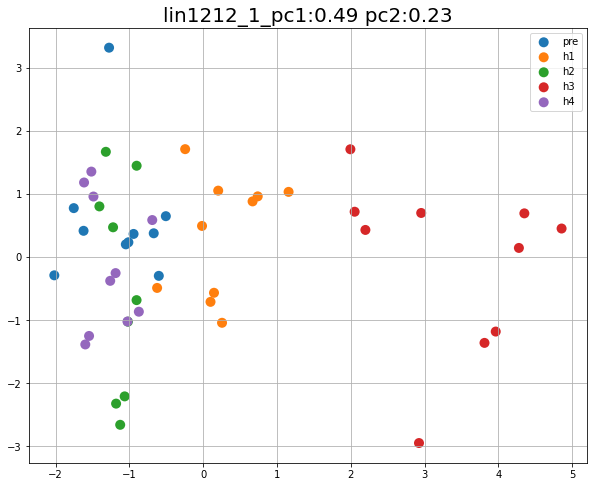

<Figure size 432x288 with 0 Axes>

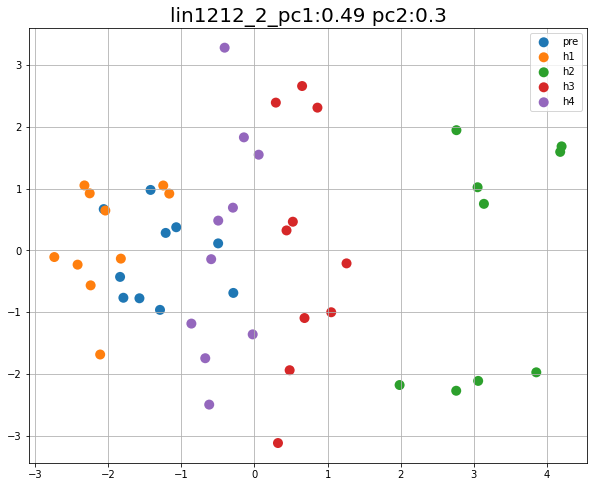

<Figure size 432x288 with 0 Axes>

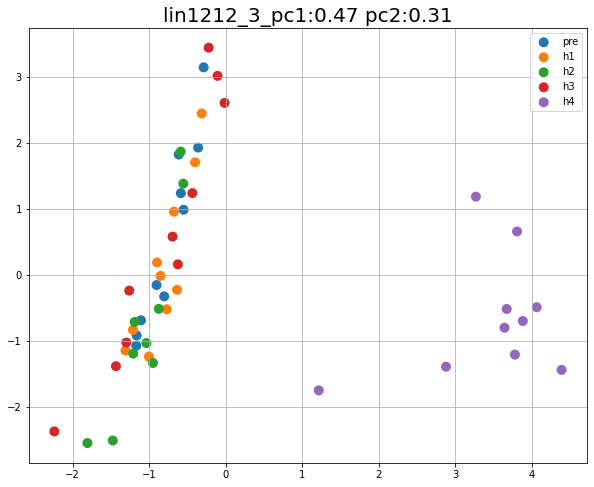

<Figure size 432x288 with 0 Axes>

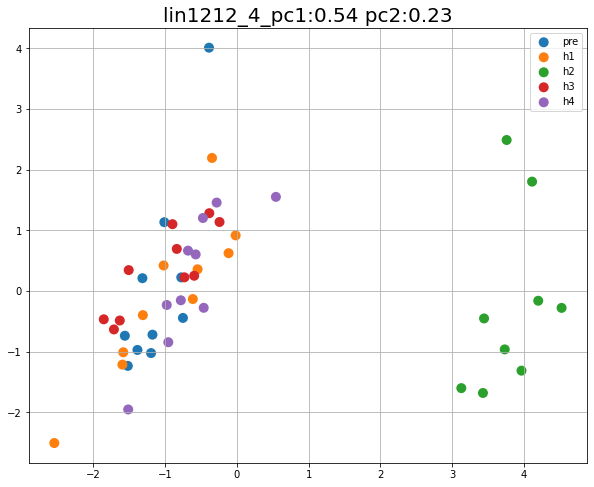

<Figure size 432x288 with 0 Axes>

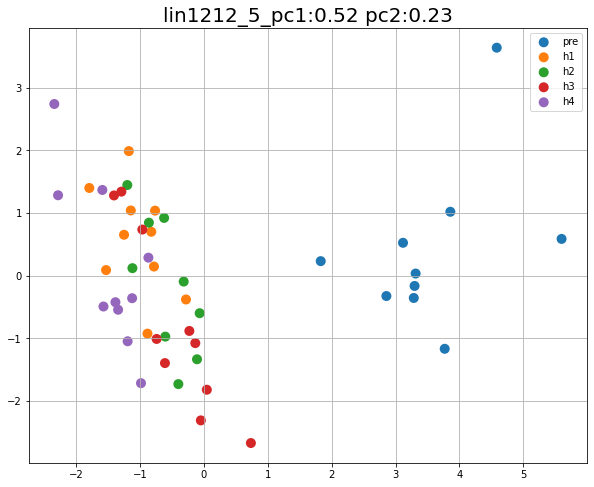

<Figure size 432x288 with 0 Axes>

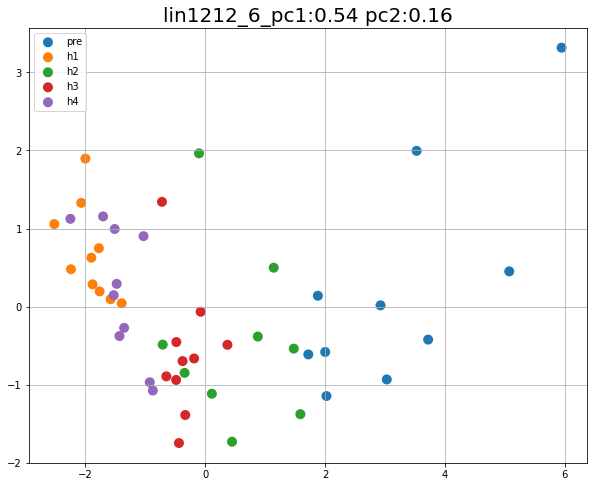

<Figure size 432x288 with 0 Axes>

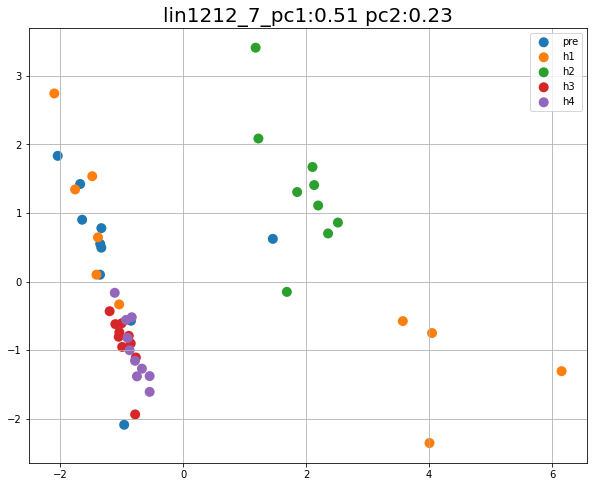

<Figure size 432x288 with 0 Axes>

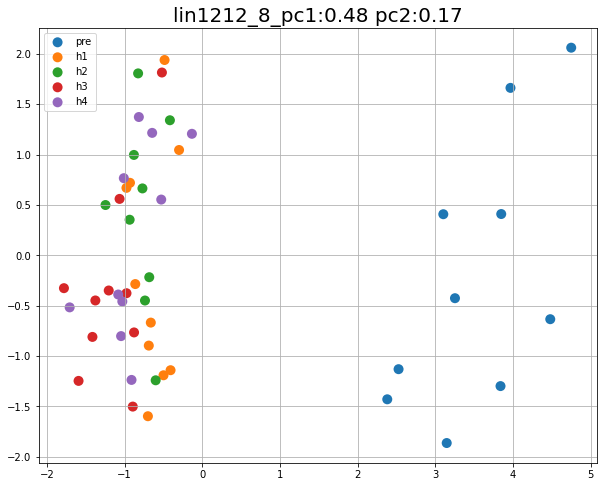

<Figure size 432x288 with 0 Axes>

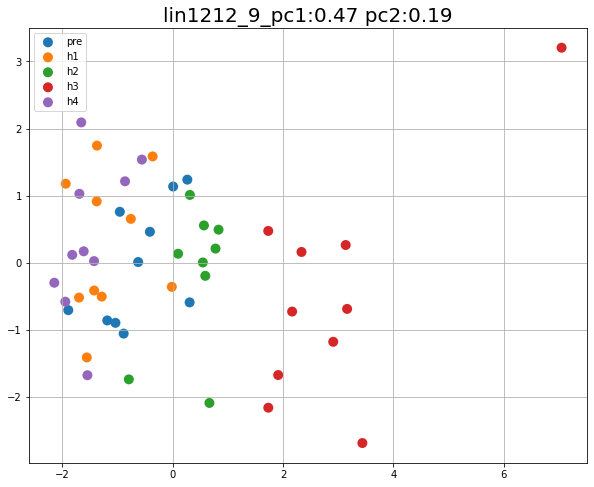

<Figure size 432x288 with 0 Axes>

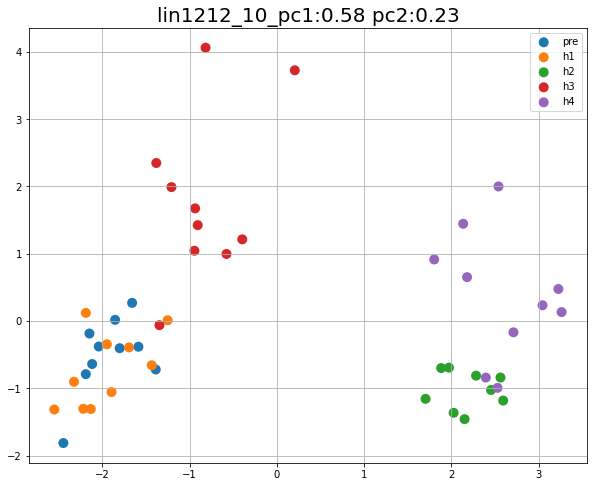

<Figure size 432x288 with 0 Axes>

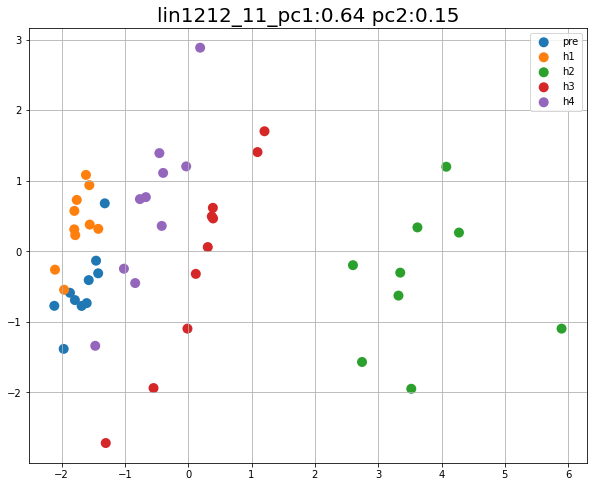

<Figure size 432x288 with 0 Axes>

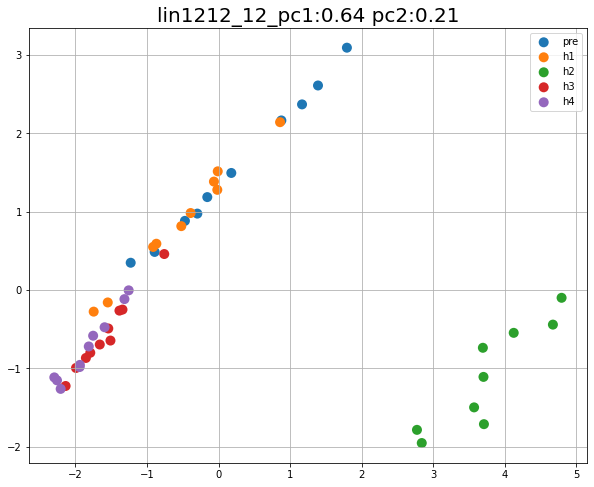

<Figure size 432x288 with 0 Axes>

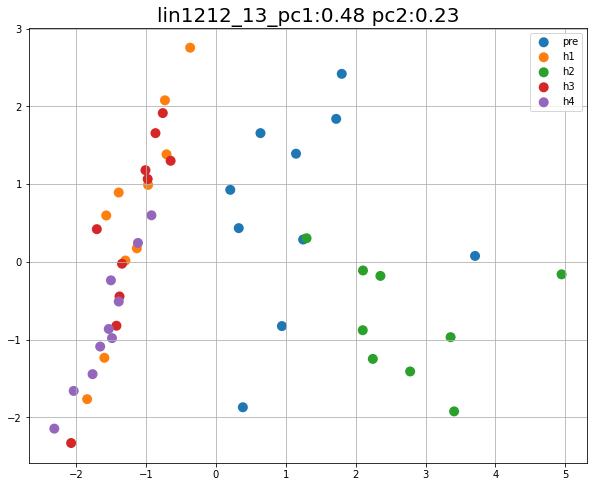

<Figure size 432x288 with 0 Axes>

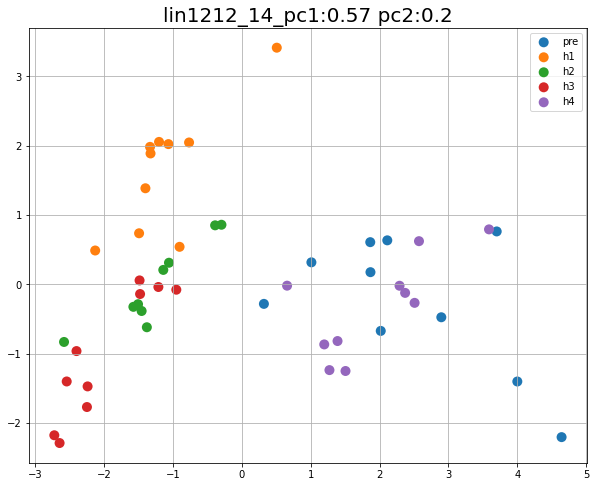

<Figure size 432x288 with 0 Axes>

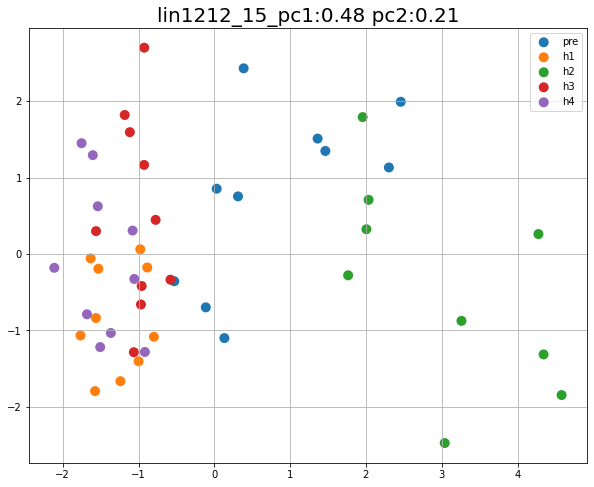

<Figure size 432x288 with 0 Axes>

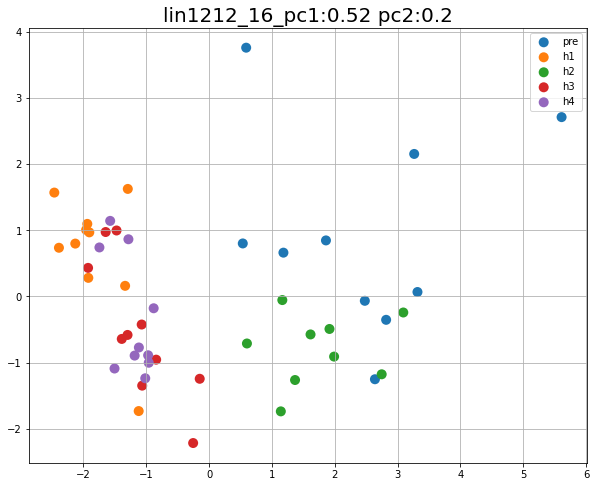

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
D=[]
for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getsepData(fullpath))
for i in range(16):
    Data= pd.DataFrame()    
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)   
    # 使用 scikit-learn 內建的 API 正規化
    scaler = StandardScaler()
    Z= scaler.fit_transform(Data)  # 注意維度
    
    # 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
    # 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
    n_components = 2
    random_state = 9527
    pca = PCA(n_components=n_components, 
              random_state=random_state)
    # 注意我們是對正規化後的特徵 Z 做 PCA
    L = pca.fit_transform(Z)  # (n_samples, n_components)

    # 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
    fig, ax = plt.subplots(figsize=(10,8))
    for j in range(len(lo)):
        ax.scatter(L[lo[j],0], L[lo[j],1], label=label[j],
                    edgecolors='none',s=100)

    s=np.round(pca.explained_variance_ratio_, 2)
    plt.title(patient+'_'+str(i+1)+'_pc1:'+str(s[0])+' pc2:'+str(s[1]), fontsize =20)
    
    ax.legend()
    ax.grid(True)
    plt.show()
    pcs = np.array(pca.components_) # (n_comp, n_features)
    df_pc = pd.DataFrame(pcs, columns=Data.columns[:])
    df_pc.index = [f"{i+1}cha_{c}_component" for c in['one', 'second']]
    df_pc.style\
        #.background_gradient(cmap='bwr_r', axis=None)\
        #.format("{:.2}")
    df_pc.to_csv(folder+'_df'+str(i+1)+'.csv')
    
    fig.savefig(folder+'_pca'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()

# pca_頻域指標

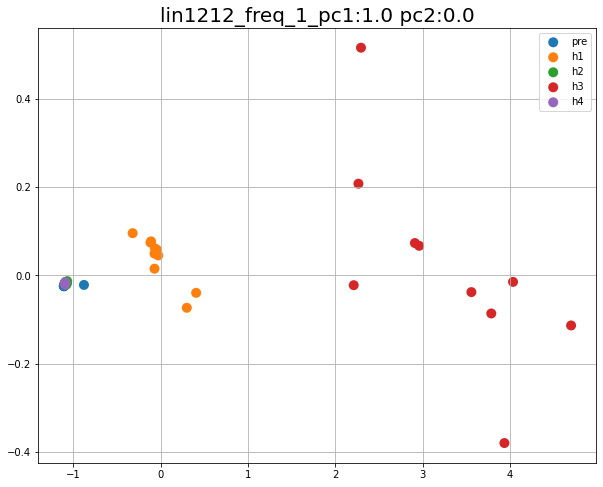

<Figure size 432x288 with 0 Axes>

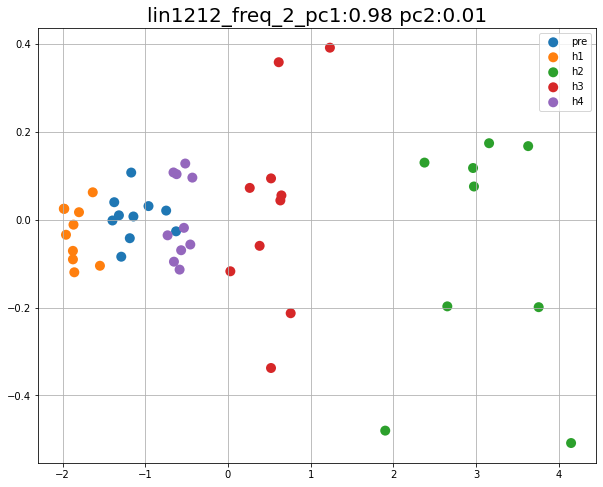

<Figure size 432x288 with 0 Axes>

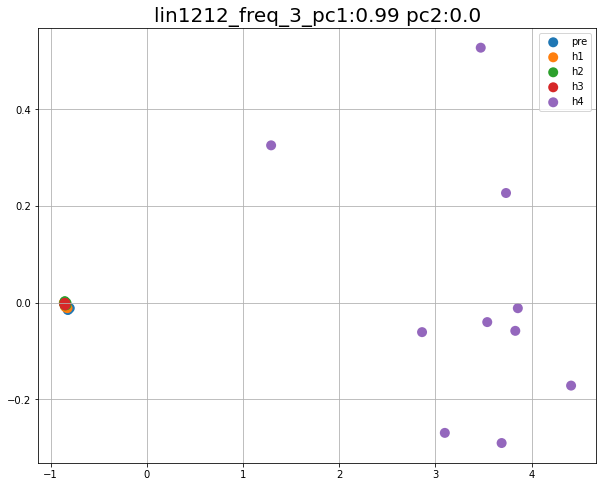

<Figure size 432x288 with 0 Axes>

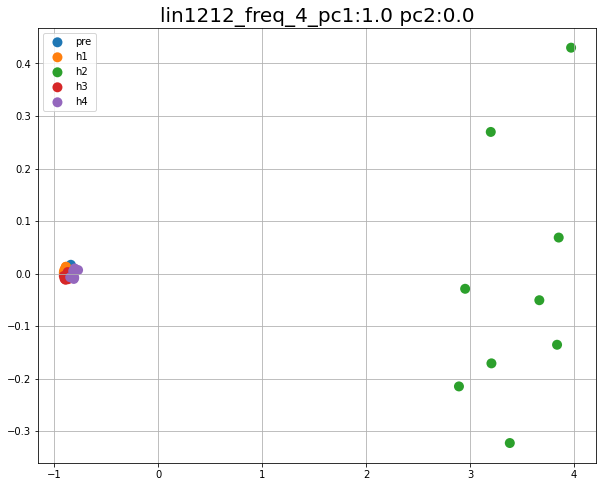

<Figure size 432x288 with 0 Axes>

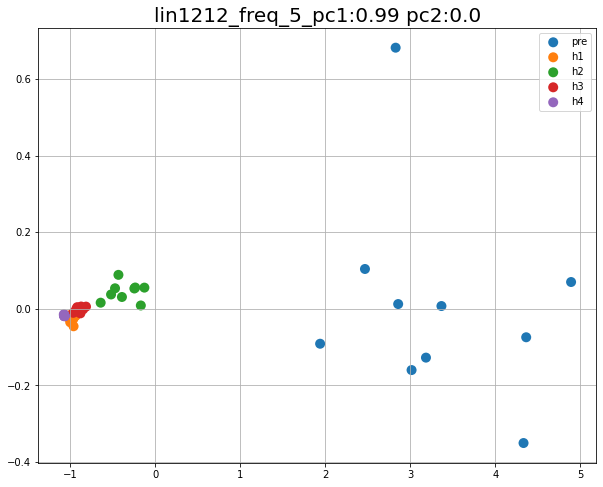

<Figure size 432x288 with 0 Axes>

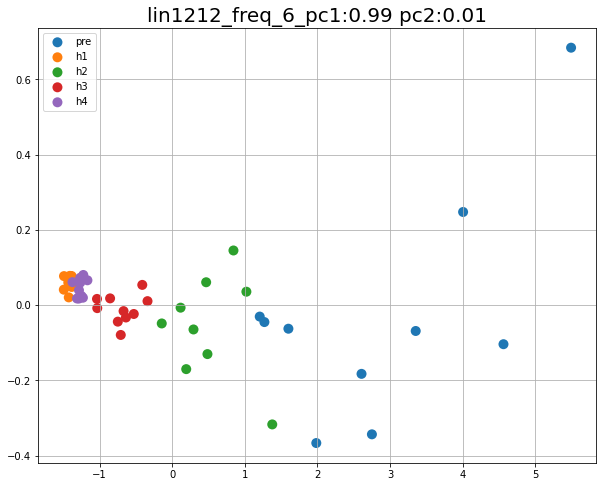

<Figure size 432x288 with 0 Axes>

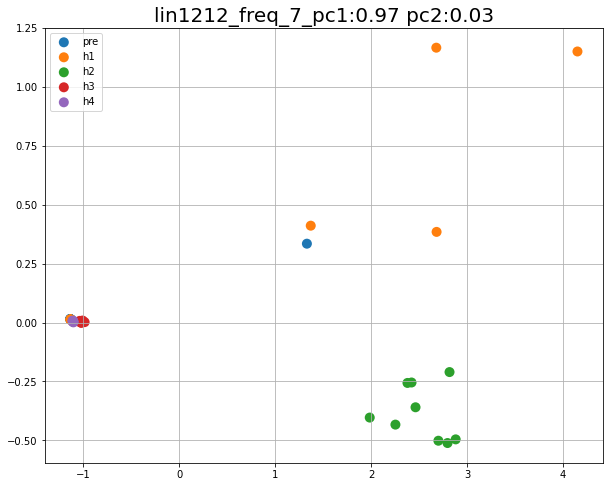

<Figure size 432x288 with 0 Axes>

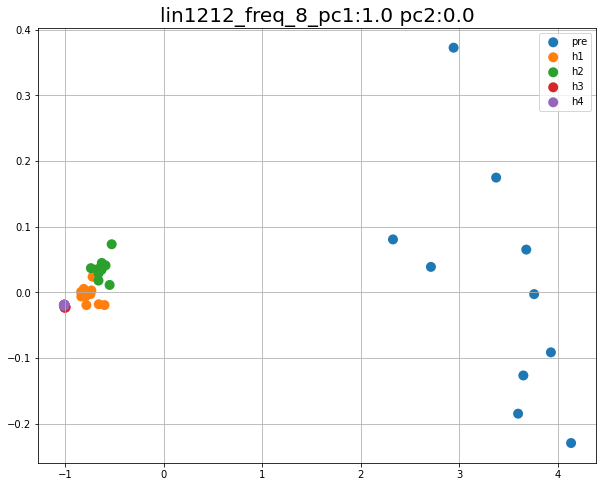

<Figure size 432x288 with 0 Axes>

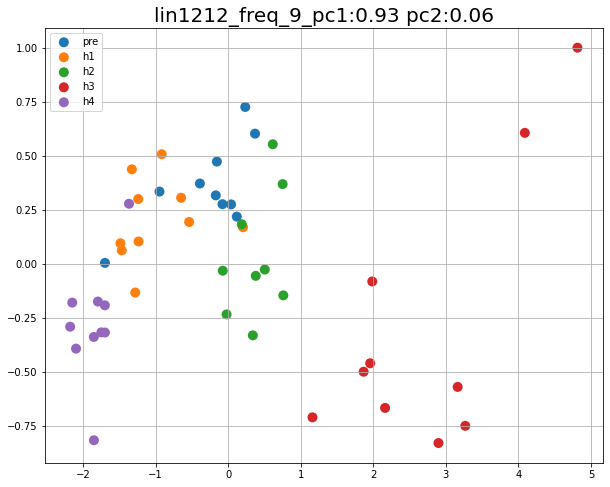

<Figure size 432x288 with 0 Axes>

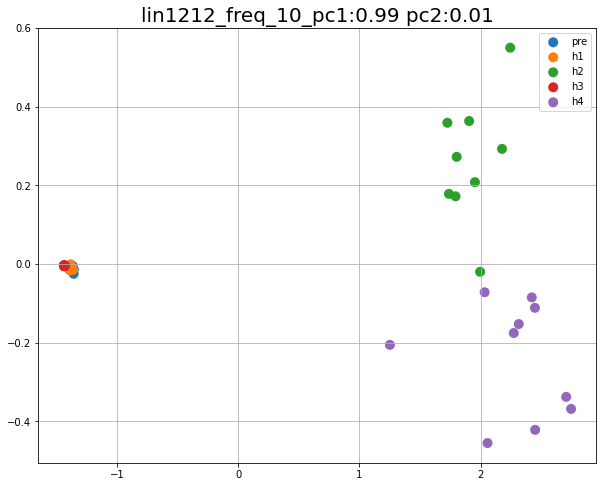

<Figure size 432x288 with 0 Axes>

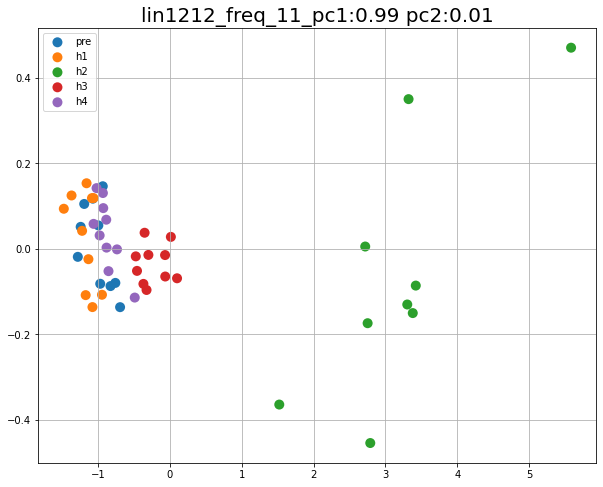

<Figure size 432x288 with 0 Axes>

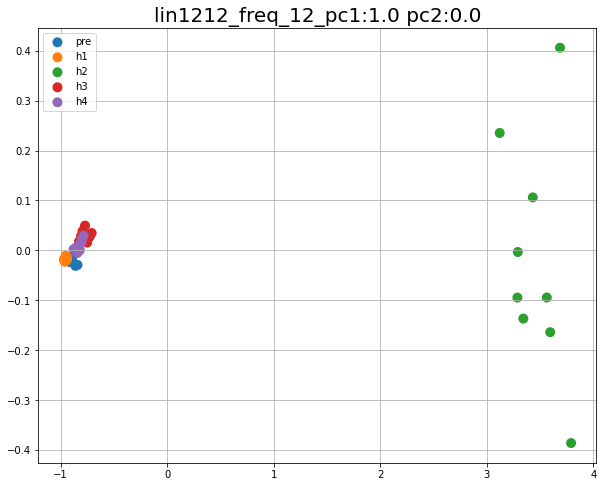

<Figure size 432x288 with 0 Axes>

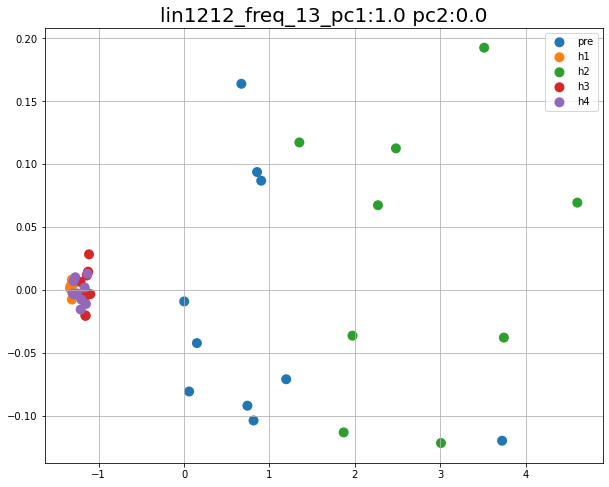

<Figure size 432x288 with 0 Axes>

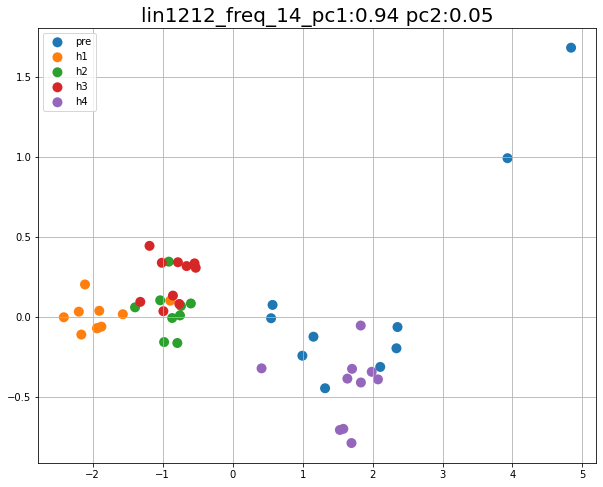

<Figure size 432x288 with 0 Axes>

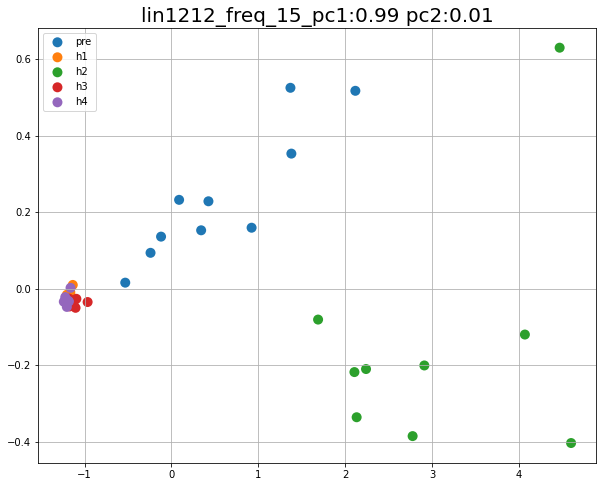

<Figure size 432x288 with 0 Axes>

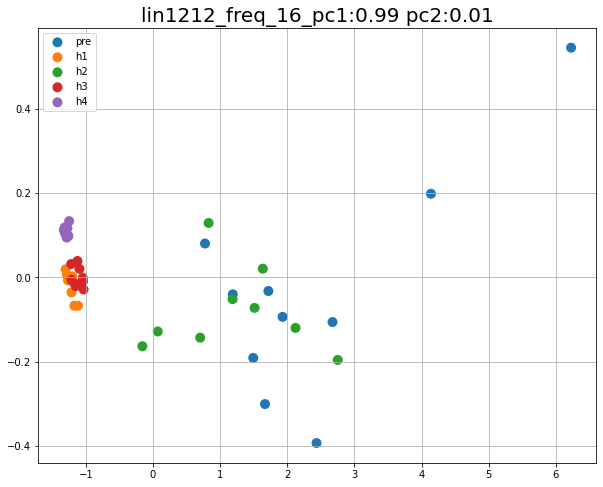

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns

D=[]
for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getsepDatafreq(fullpath))
for i in range(16):
    Data= pd.DataFrame()    
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)   
    # 使用 scikit-learn 內建的 API 正規化
    scaler = StandardScaler()
    Z= scaler.fit_transform(Data)  # 注意維度
    
    # 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
    # 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
    n_components = 2
    random_state = 9527
    pca = PCA(n_components=n_components, 
              random_state=random_state)
    # 注意我們是對正規化後的特徵 Z 做 PCA
    L = pca.fit_transform(Z)  # (n_samples, n_components)

    # 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸

    fig, ax = plt.subplots(figsize=(10,8))
    for j in range(len(lo)):
        ax.scatter(L[lo[j],0], L[lo[j],1], label=label[j],
                    edgecolors='none',s=100)
    s=np.round(pca.explained_variance_ratio_, 2)

    plt.title(patient+'_freq_'+str(i+1)+'_pc1:'+str(s[0])+' pc2:'+str(s[1]), fontsize =20)
    
    ax.legend()
    ax.grid(True)
    plt.show()
    pcs = np.array(pca.components_) # (n_comp, n_features)

    df_pc = pd.DataFrame(pcs, columns=Data.columns[:])
    df_pc.index = [f"{i+1}cha_{c}_component" for c in['one', 'second']]
    df_pc.style\
        .background_gradient(cmap='bwr_r', axis=None)\
        .format("{:.2}")
    df_pc.to_csv(folder+'_freq_df'+str(i+1)+'.csv')
    fig.savefig(folder+'_freq_pca'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()

# pca 時域指標

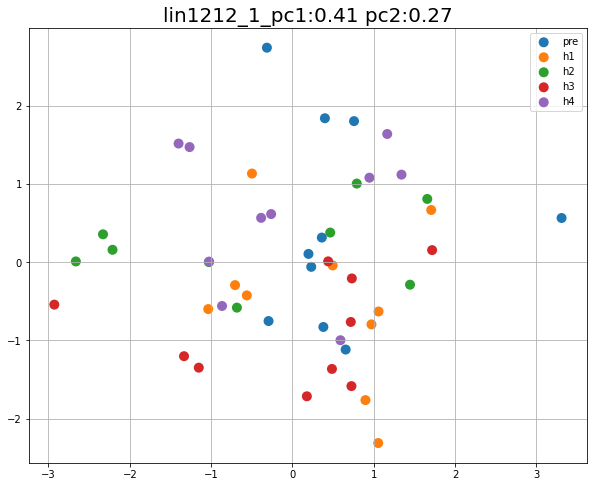

<Figure size 432x288 with 0 Axes>

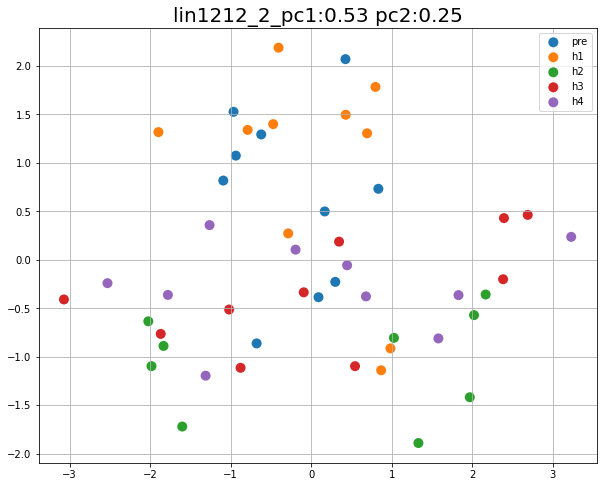

<Figure size 432x288 with 0 Axes>

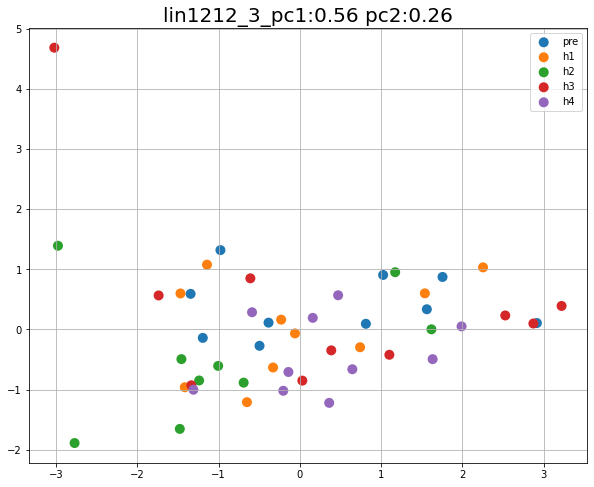

<Figure size 432x288 with 0 Axes>

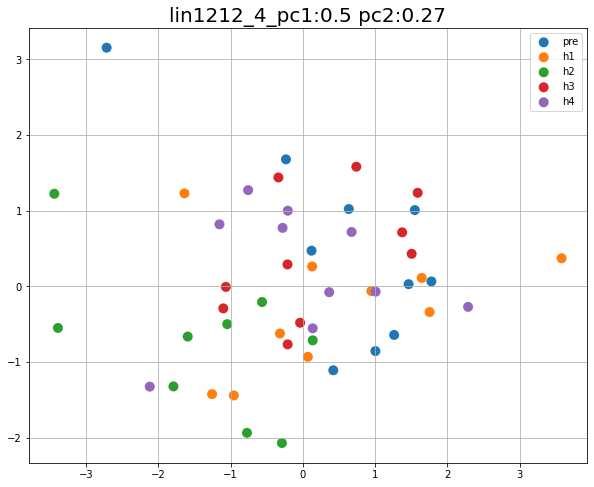

<Figure size 432x288 with 0 Axes>

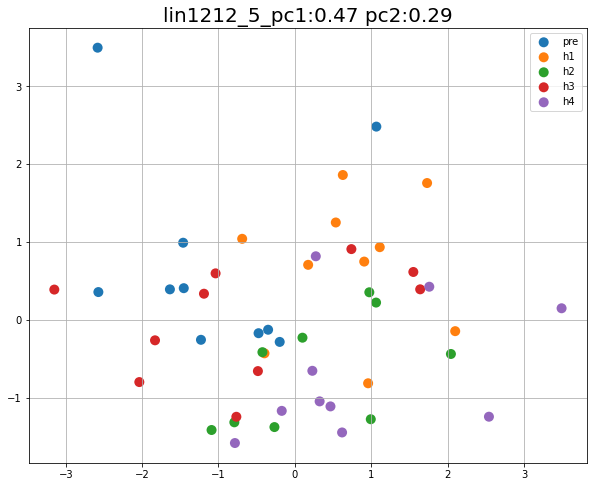

<Figure size 432x288 with 0 Axes>

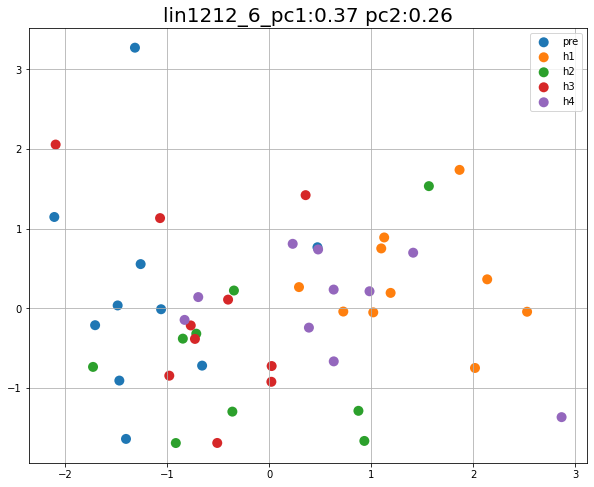

<Figure size 432x288 with 0 Axes>

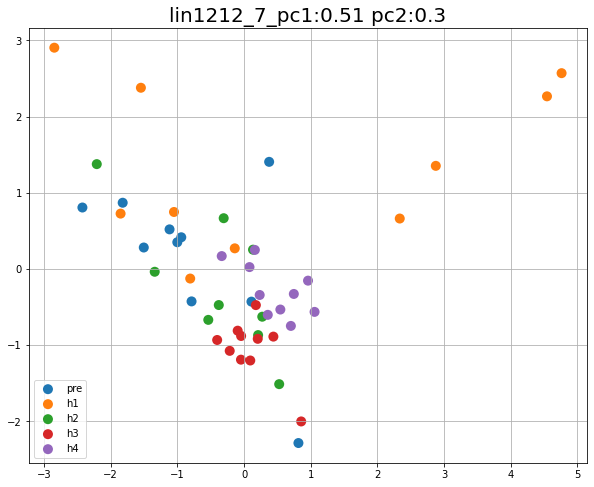

<Figure size 432x288 with 0 Axes>

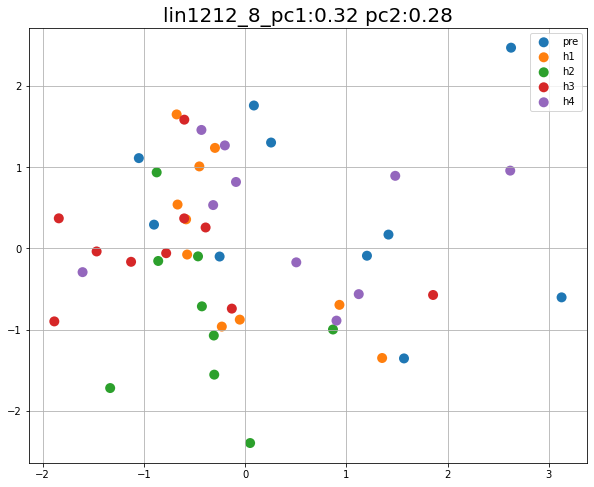

<Figure size 432x288 with 0 Axes>

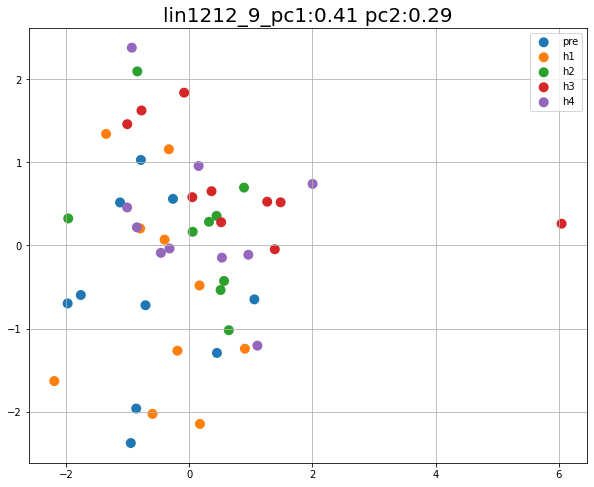

<Figure size 432x288 with 0 Axes>

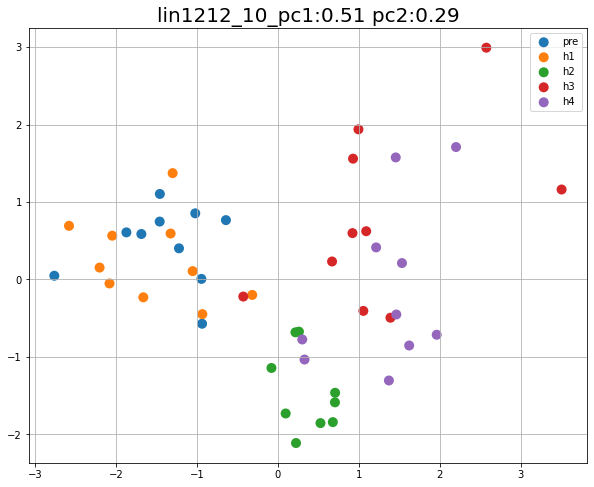

<Figure size 432x288 with 0 Axes>

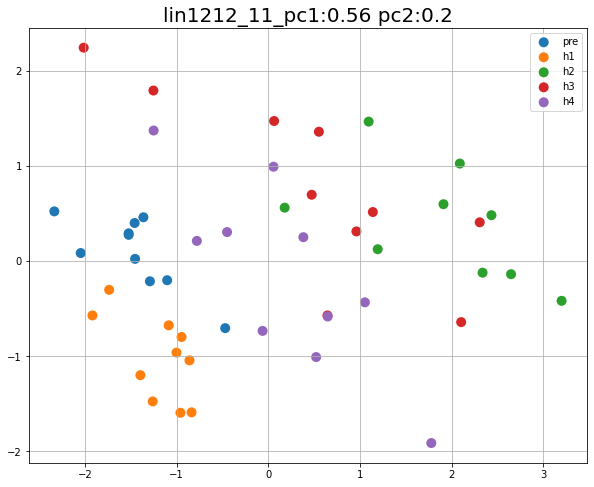

<Figure size 432x288 with 0 Axes>

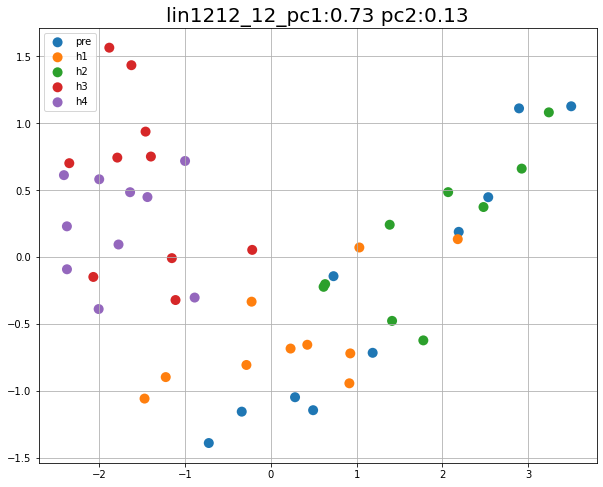

<Figure size 432x288 with 0 Axes>

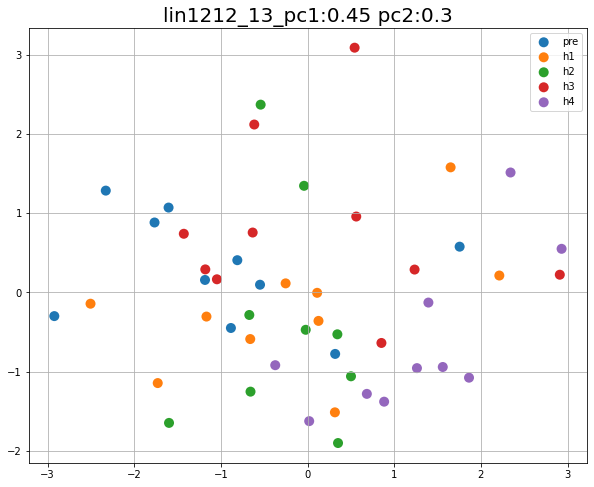

<Figure size 432x288 with 0 Axes>

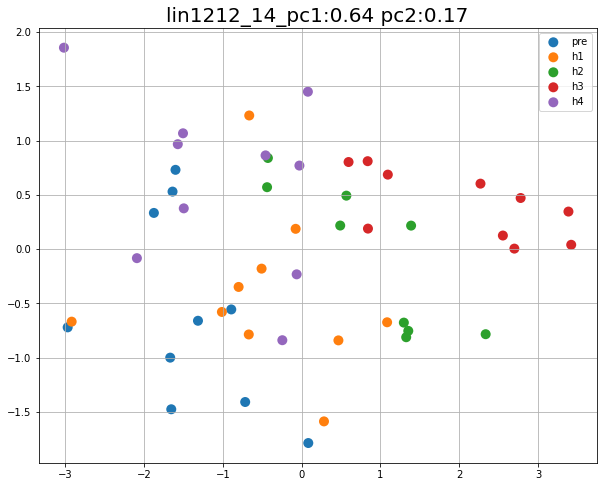

<Figure size 432x288 with 0 Axes>

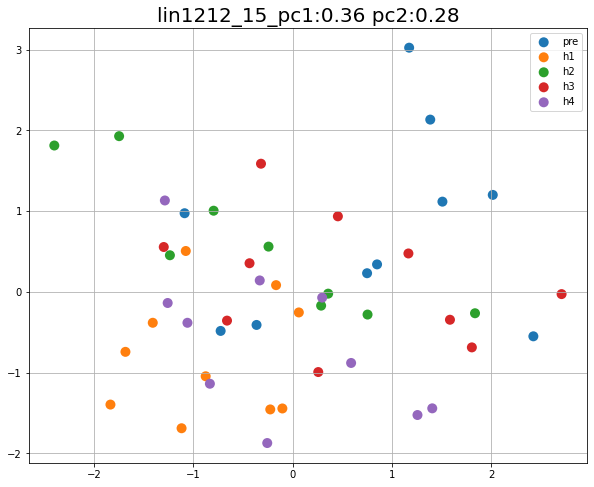

<Figure size 432x288 with 0 Axes>

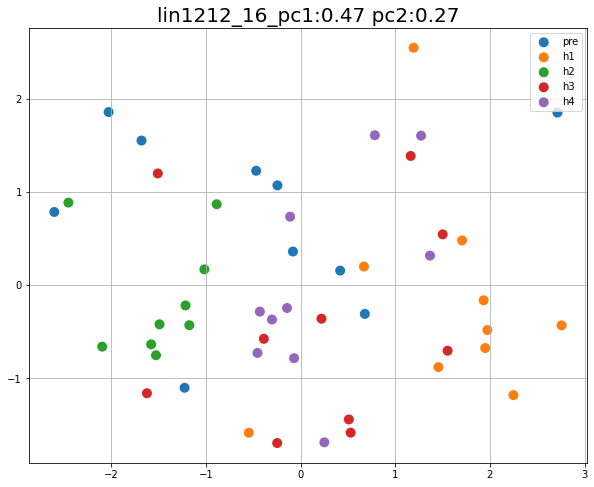

<Figure size 432x288 with 0 Axes>

In [35]:
import seaborn as sns
D=[]
for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getsepDatatime(fullpath))
for i in range(16):
    Data= pd.DataFrame()    
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)   
        # 使用 scikit-learn 內建的 API 正規化
    scaler = StandardScaler()
    Z= scaler.fit_transform(Data)  # 注意維度
    
    # 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
    # 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
    n_components = 2
    random_state = 9527
    pca = PCA(n_components=n_components, 
              random_state=random_state)
    # 注意我們是對正規化後的特徵 Z 做 PCA
    L = pca.fit_transform(Z)  # (n_samples, n_components)

    # 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
    fig, ax = plt.subplots(figsize=(10,8))

    for j in range(len(lo)):
        ax.scatter(L[lo[j],0], L[lo[j],1],  label=label[j],
                    edgecolors='none',s=100)
    s=np.round(pca.explained_variance_ratio_, 2)

    plt.title(patient+'_'+str(i+1)+'_pc1:'+str(s[0])+' pc2:'+str(s[1]), fontsize =20)
    
    ax.legend()
    ax.grid(True)
    plt.show()
    pcs = np.array(pca.components_) # (n_comp, n_features)

    df_pc = pd.DataFrame(pcs, columns=Data.columns[:])
    df_pc.index = [f"{i+1}cha_{c}_component" for c in['one', 'second']]
    df_pc.style\
        .background_gradient(cmap='bwr_r', axis=None)\
        .format("{:.2}")
    df_pc.to_csv(folder+'_time_df'+str(i+1)+'.csv')
    fig.savefig(folder+'_time_pca'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()

# 將多個csv檔案合併成一個檔案

In [36]:
import csv
from pathlib import Path
# 讀入檔案
rows =[]
# 最初讀入時，header也要讀入
for file in Path(patient).glob("*.csv"):
    if(file==(folder+patient+'_df.csv')):
        continue
    f = open(file)
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
    rows.append([''])
    f.close()
for folder, subfolders, files in os.walk(patient+'/'):        
    for file in files:        
        # checking if file is 
        # of .csv type 
        if file.endswith('.csv'): 
            path = os.path.join(folder, file) 
                
            # deleting the csv file 
            os.remove(path)
# 寫入檔案
f = open(folder+patient+'_df.csv',mode='w', newline="")
writer = csv.writer(f)
for row in rows:
    writer.writerow(row)
f.close()

# barchart

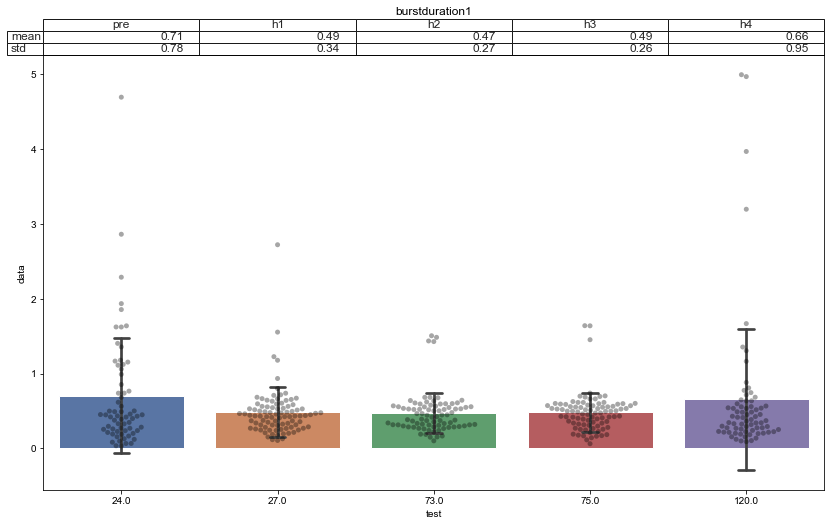

<Figure size 432x288 with 0 Axes>

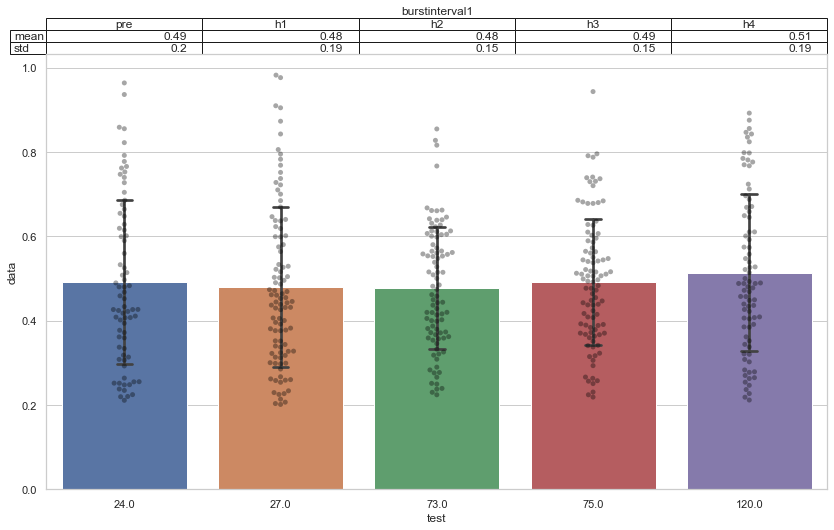

<Figure size 432x288 with 0 Axes>

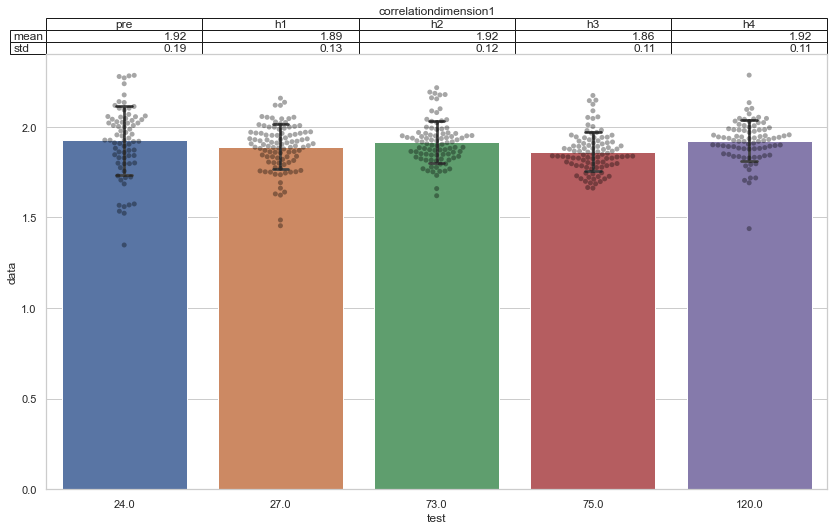

<Figure size 432x288 with 0 Axes>

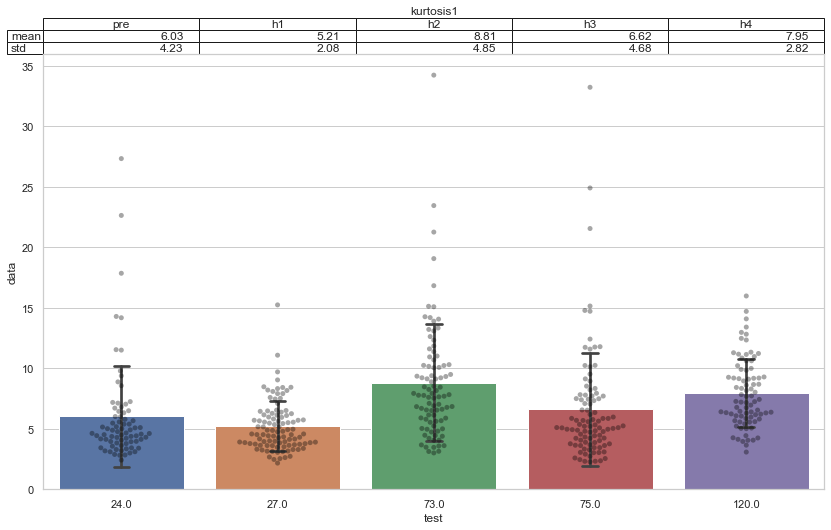

<Figure size 432x288 with 0 Axes>

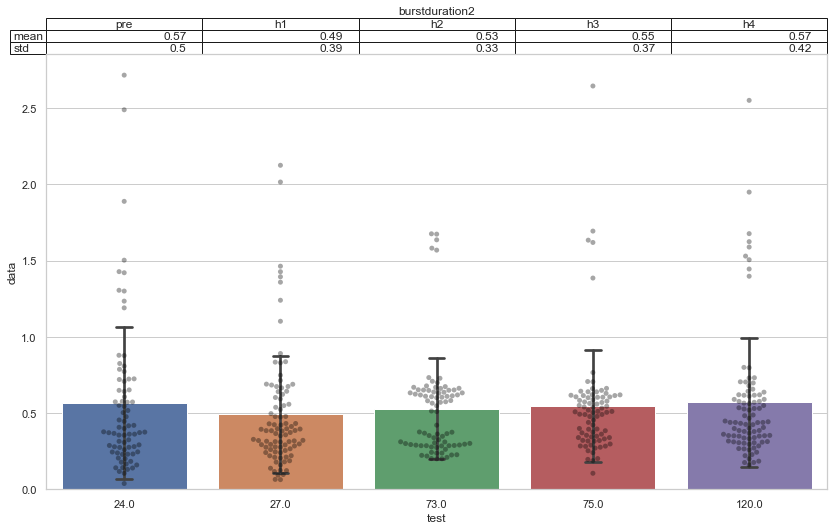

<Figure size 432x288 with 0 Axes>

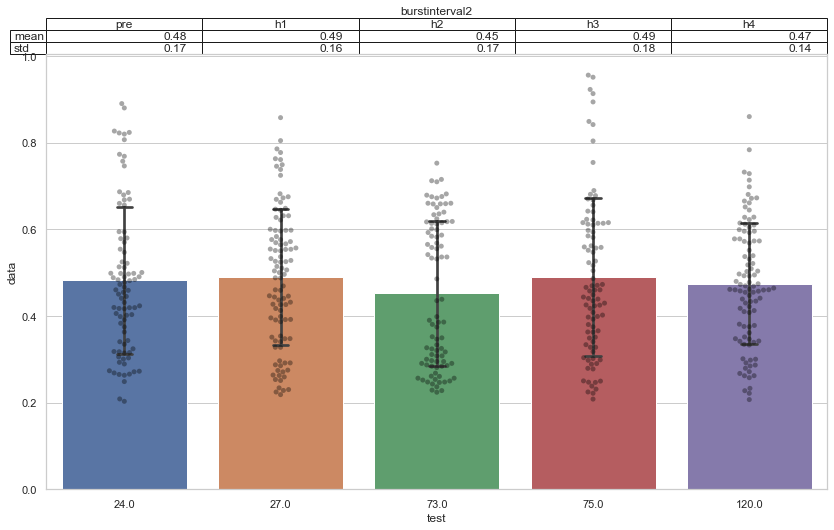

<Figure size 432x288 with 0 Axes>

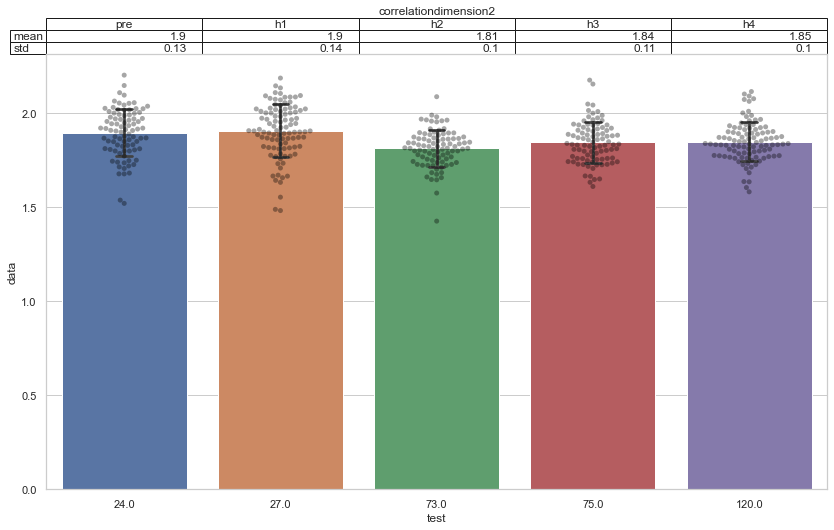

<Figure size 432x288 with 0 Axes>

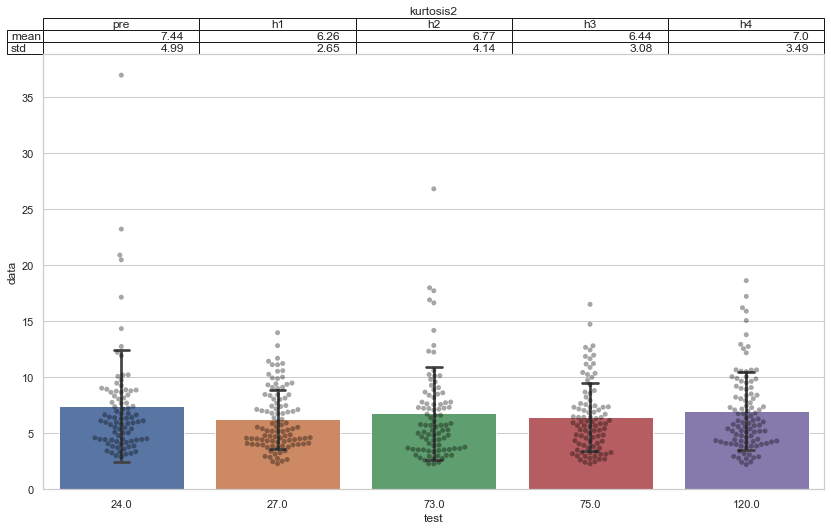

<Figure size 432x288 with 0 Axes>

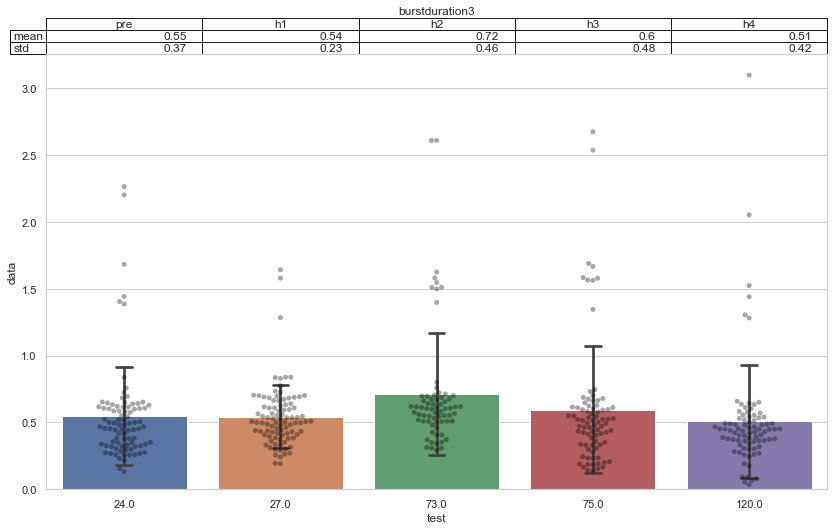

<Figure size 432x288 with 0 Axes>

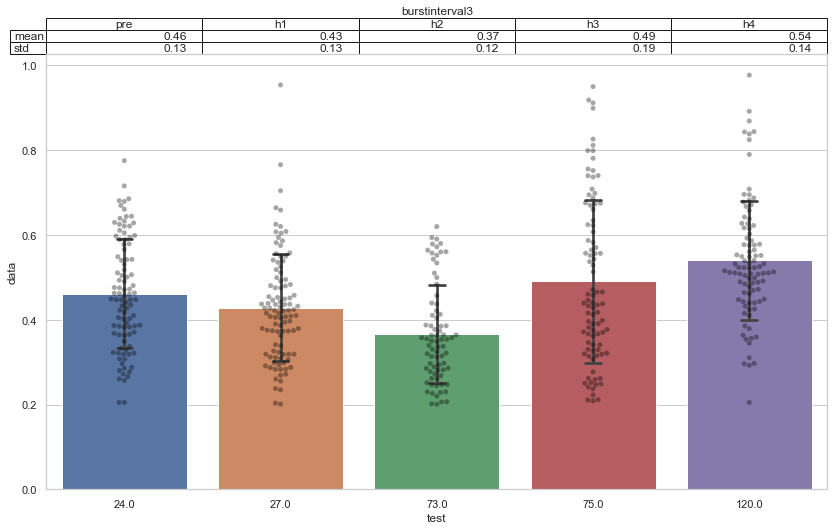

<Figure size 432x288 with 0 Axes>

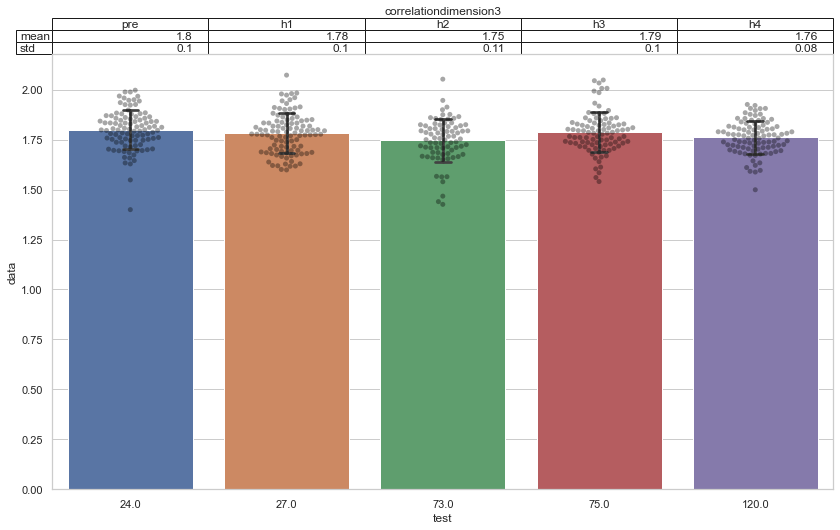

<Figure size 432x288 with 0 Axes>

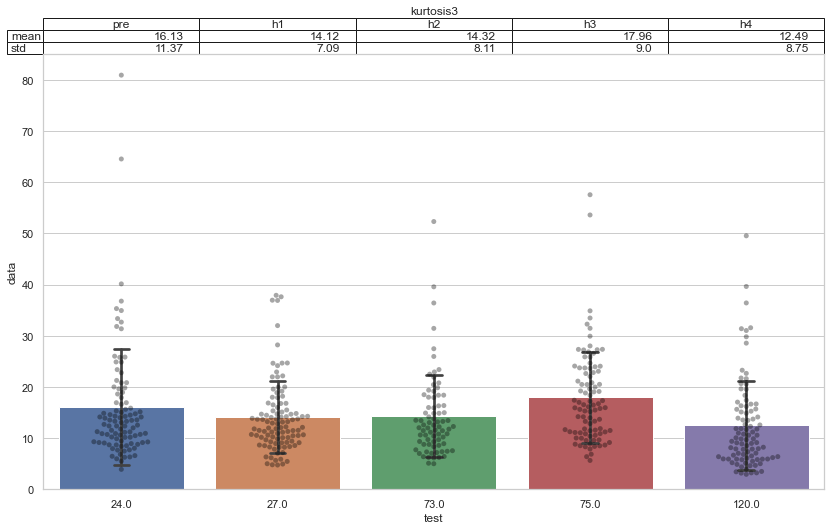

<Figure size 432x288 with 0 Axes>

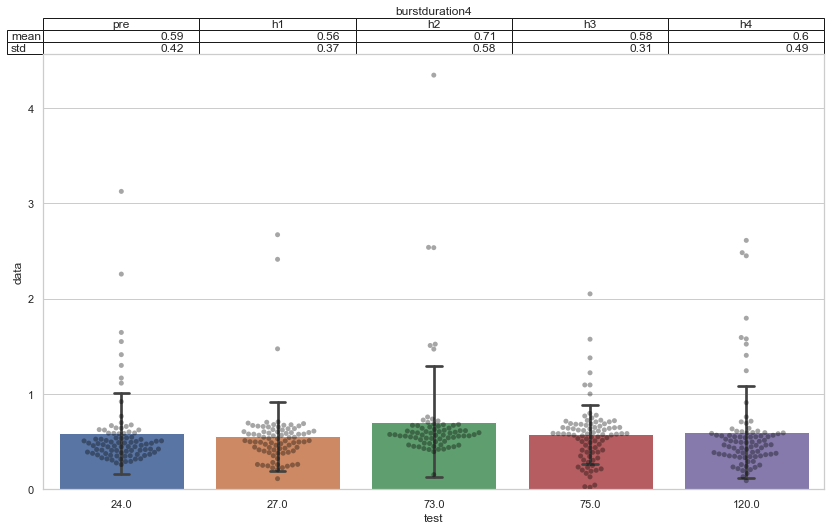

<Figure size 432x288 with 0 Axes>

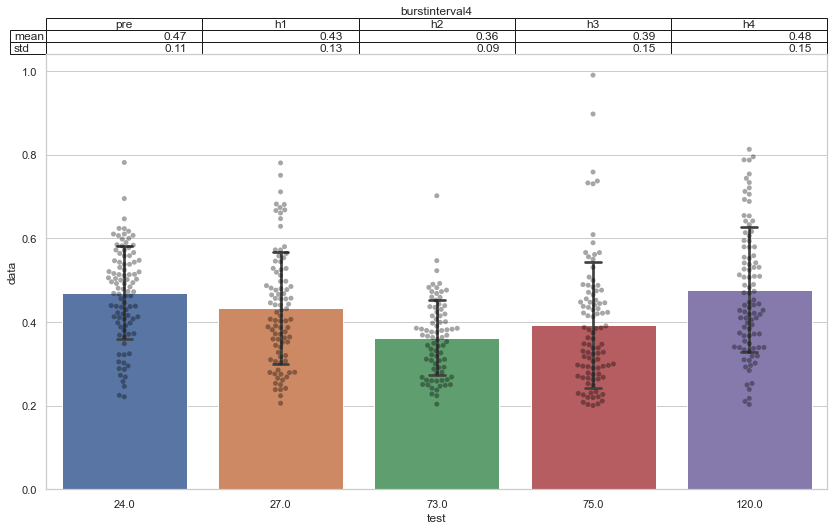

<Figure size 432x288 with 0 Axes>

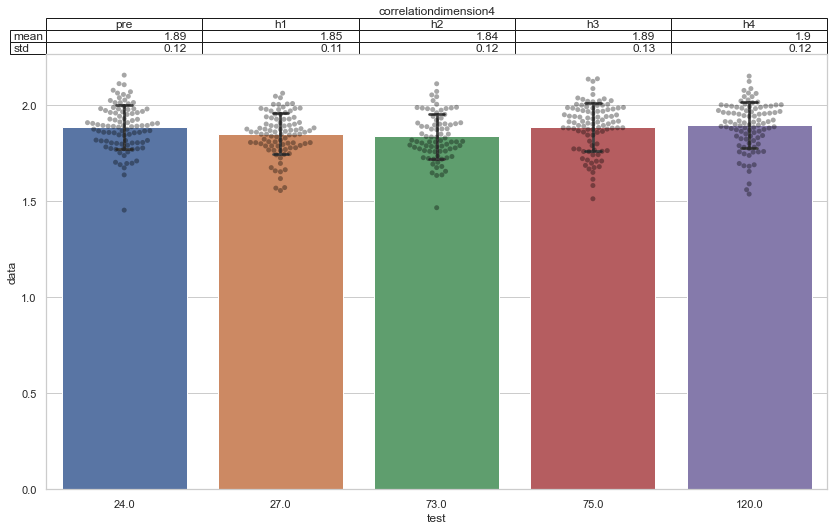

<Figure size 432x288 with 0 Axes>

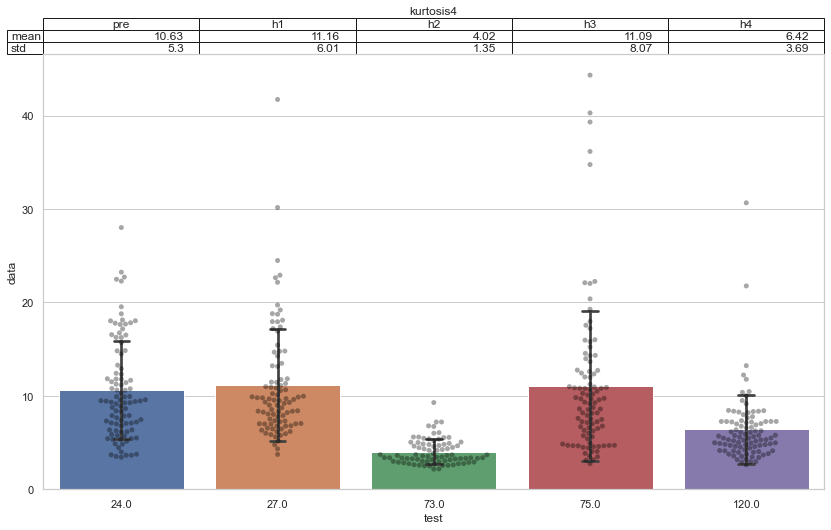

<Figure size 432x288 with 0 Axes>

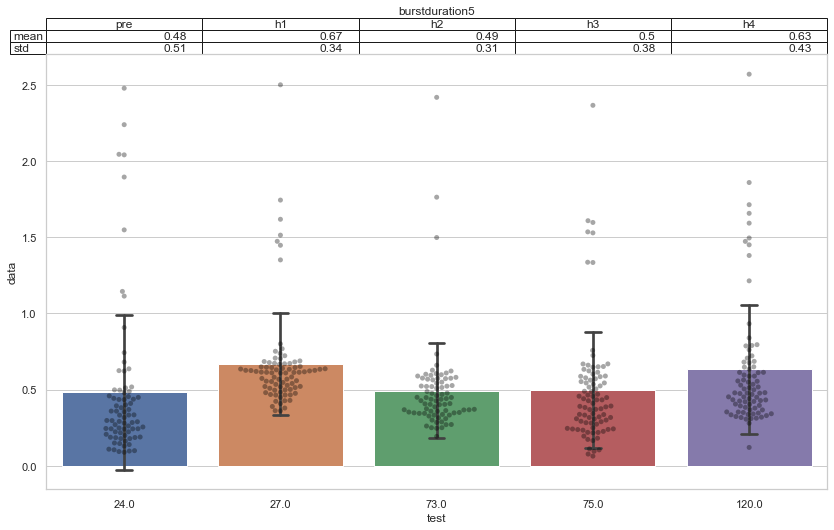

<Figure size 432x288 with 0 Axes>

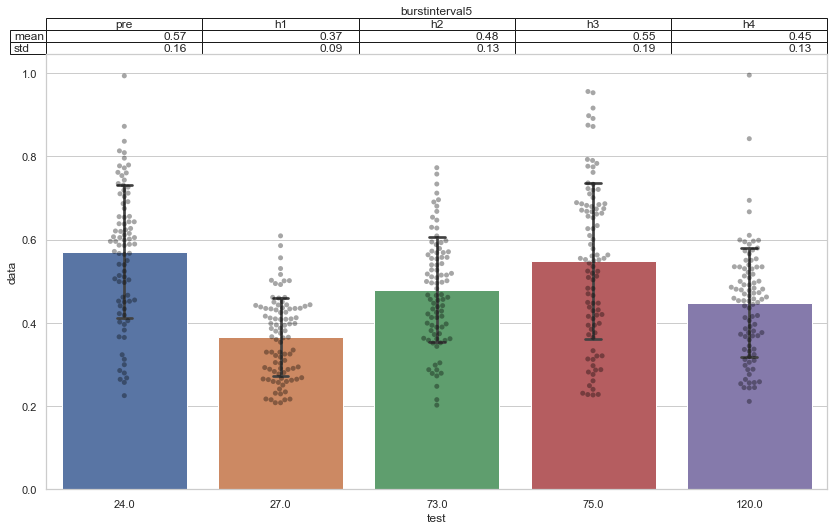

<Figure size 432x288 with 0 Axes>

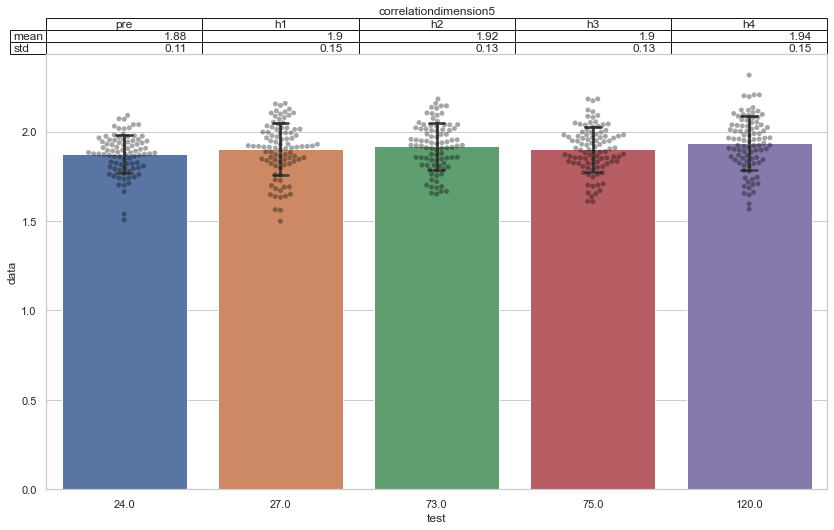

<Figure size 432x288 with 0 Axes>

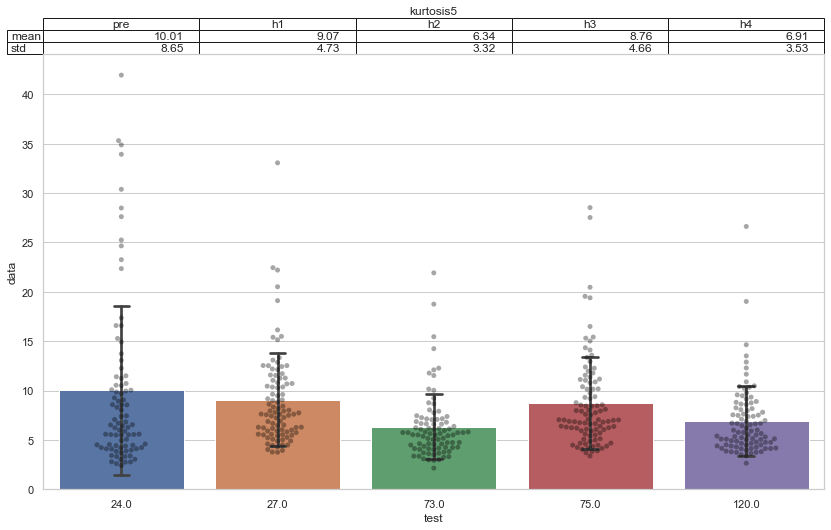

<Figure size 432x288 with 0 Axes>

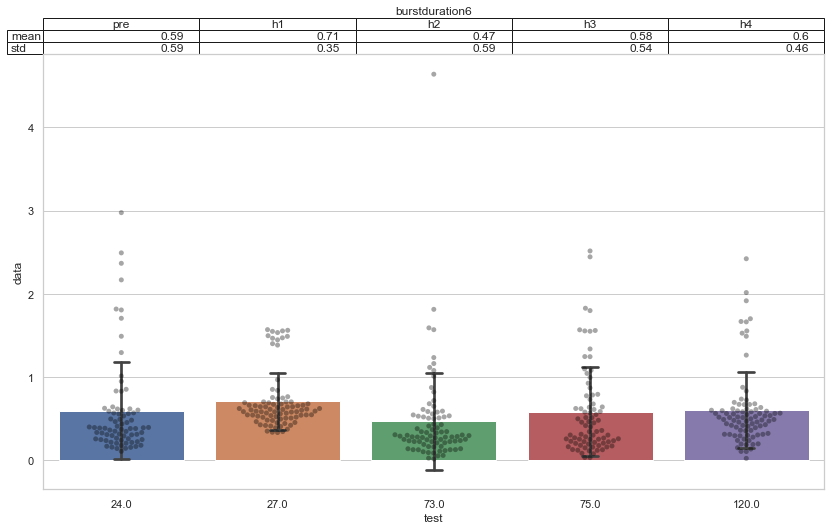

<Figure size 432x288 with 0 Axes>

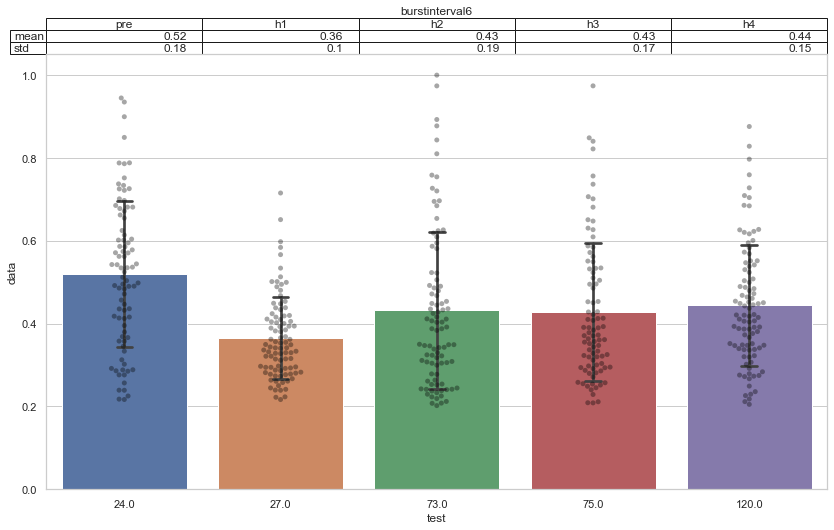

<Figure size 432x288 with 0 Axes>

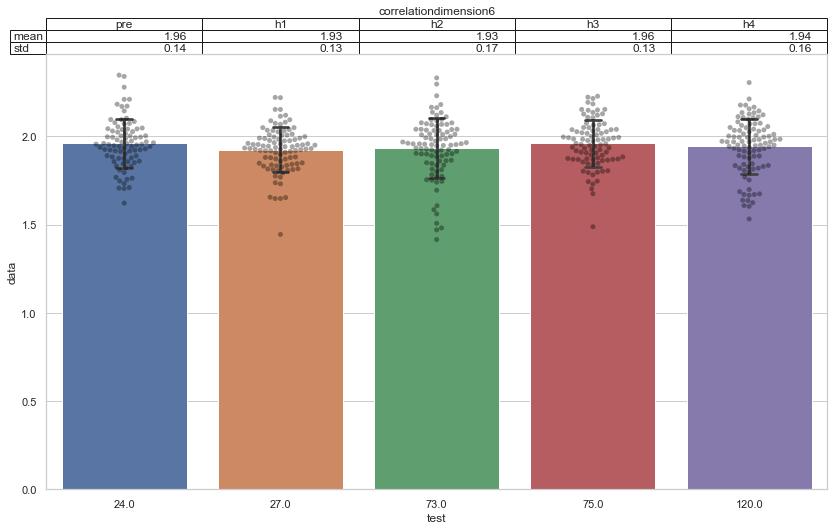

<Figure size 432x288 with 0 Axes>

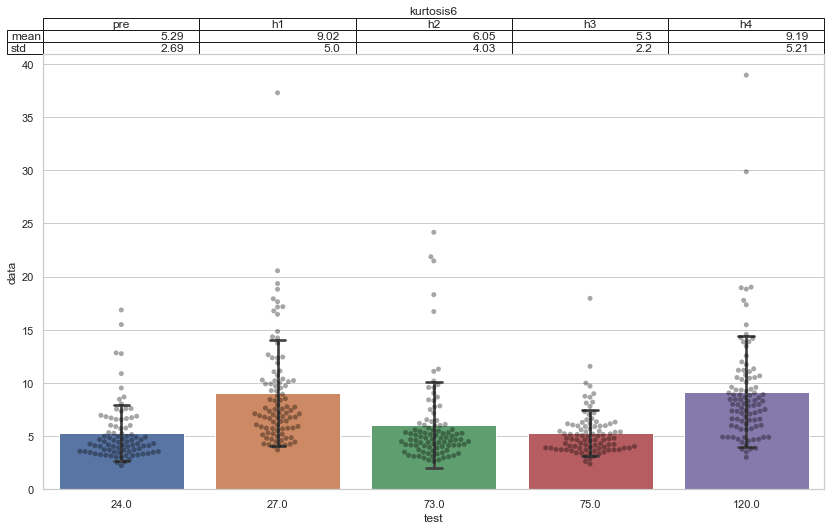

<Figure size 432x288 with 0 Axes>

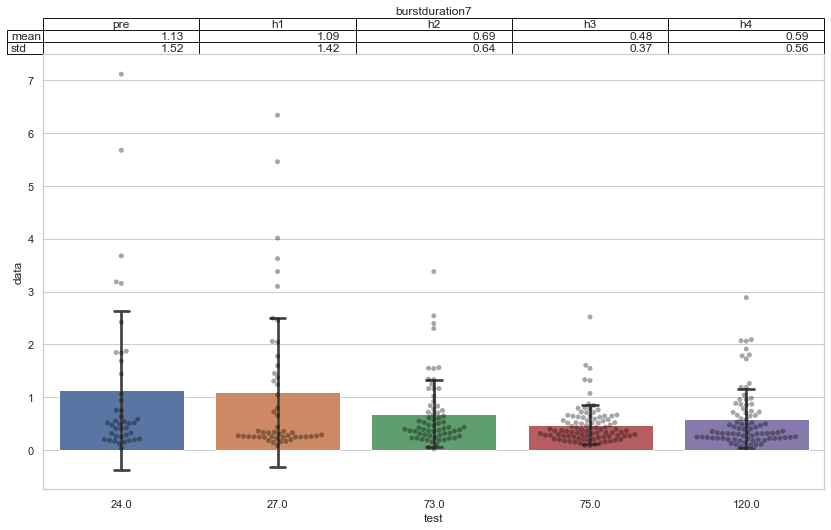

<Figure size 432x288 with 0 Axes>

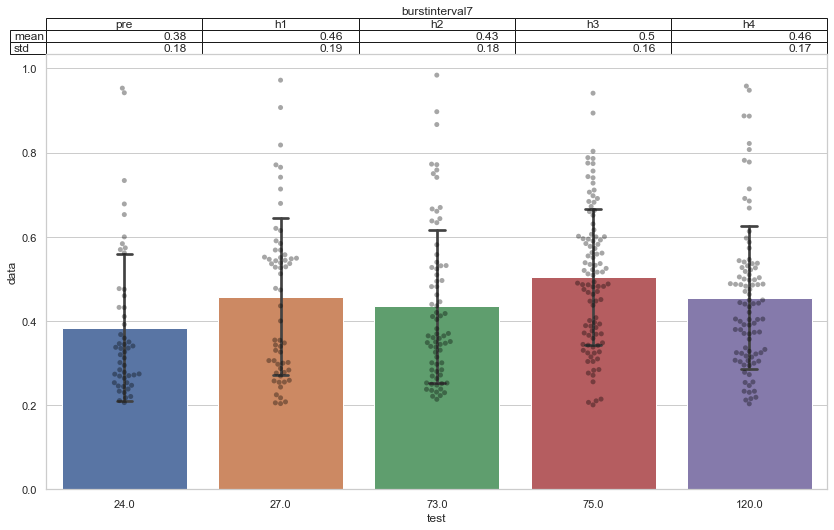

<Figure size 432x288 with 0 Axes>

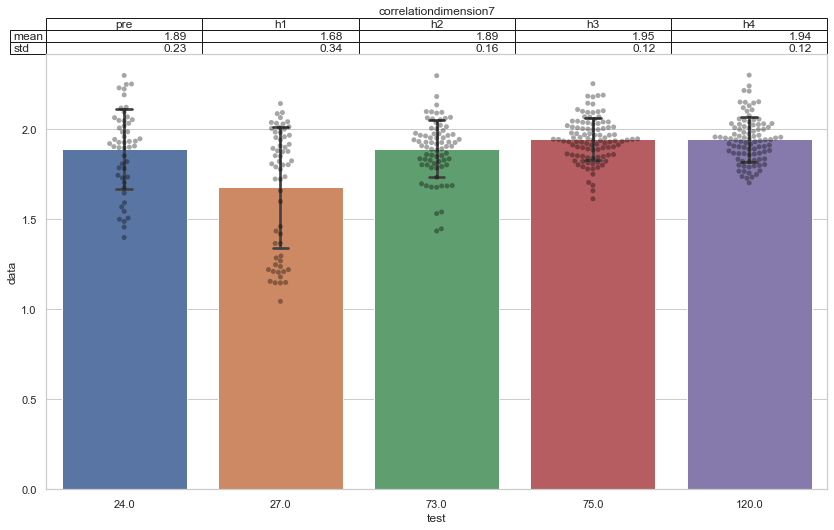

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

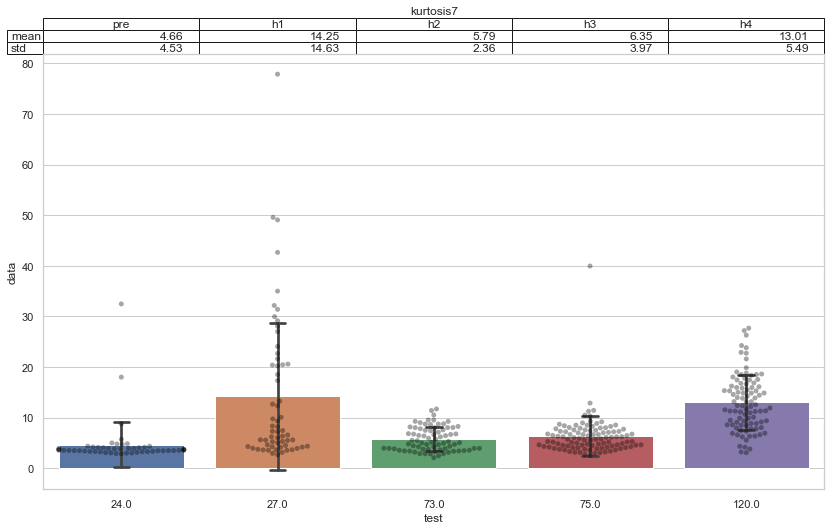

<Figure size 432x288 with 0 Axes>

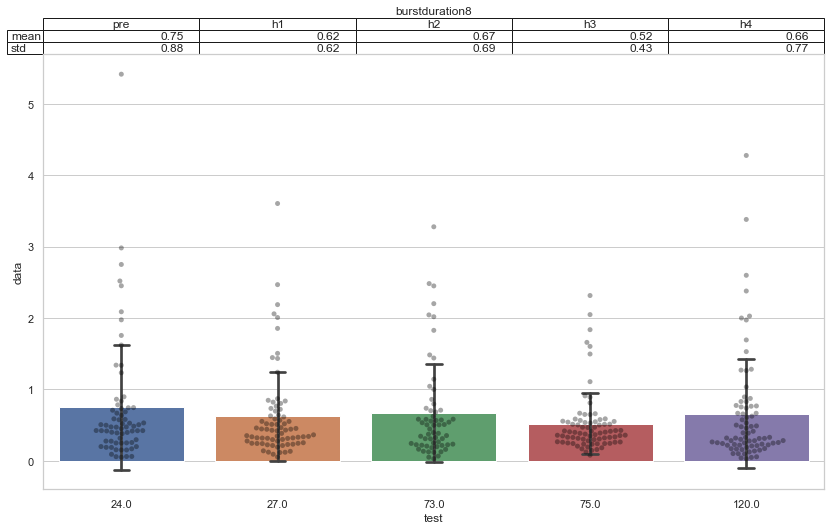

<Figure size 432x288 with 0 Axes>

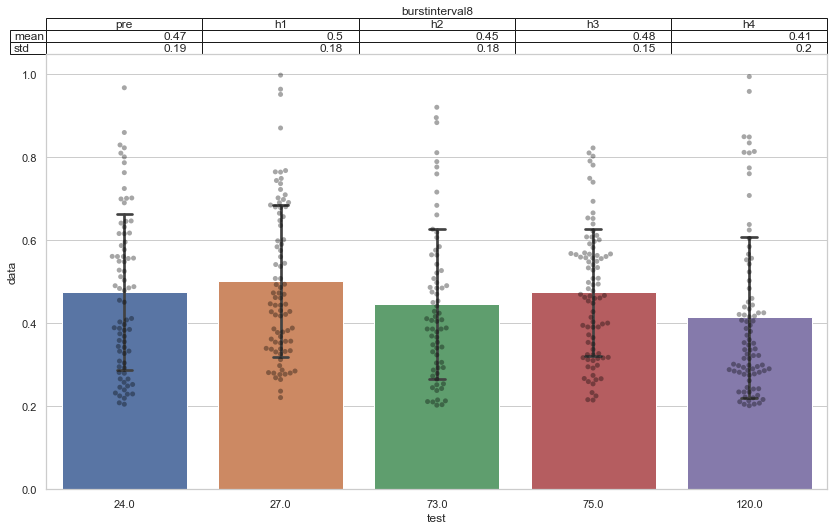

<Figure size 432x288 with 0 Axes>

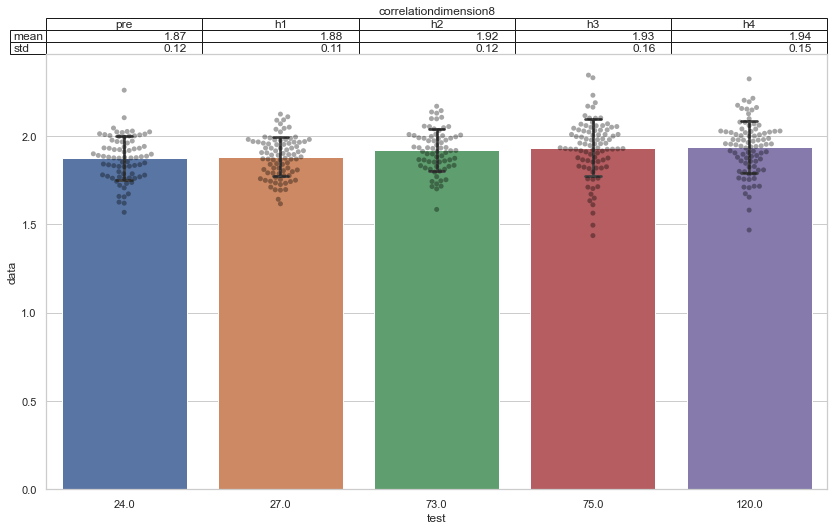

<Figure size 432x288 with 0 Axes>

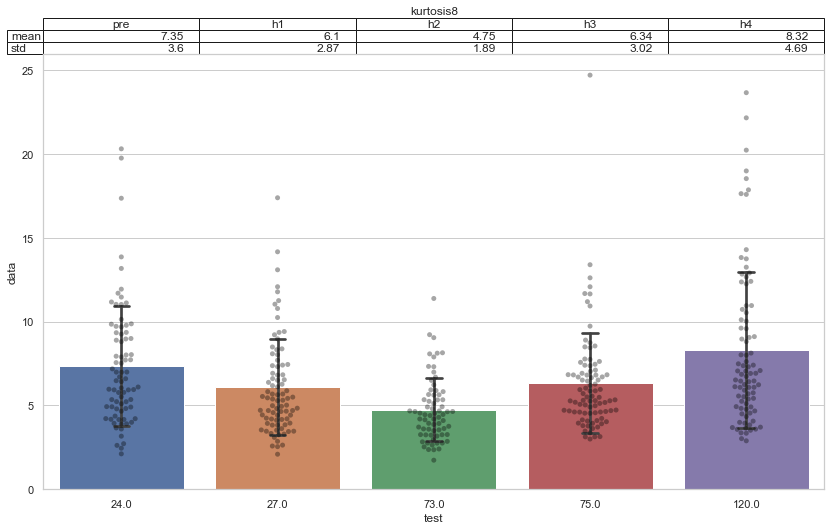

<Figure size 432x288 with 0 Axes>

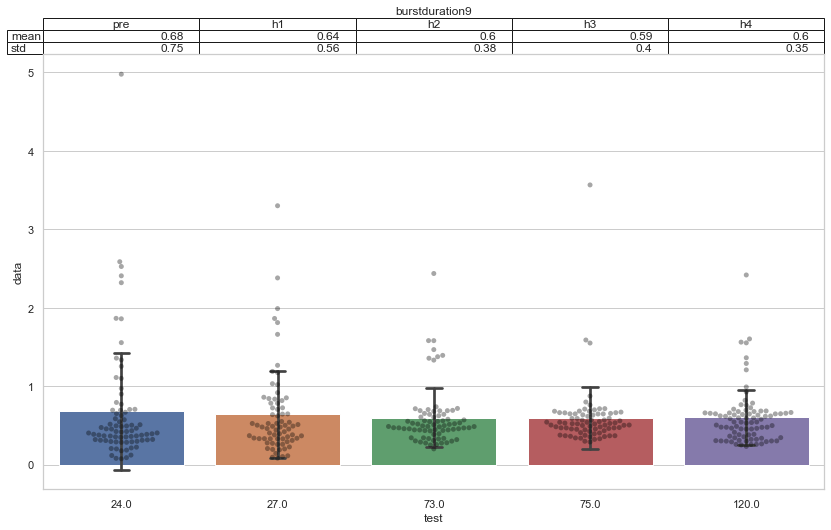

<Figure size 432x288 with 0 Axes>

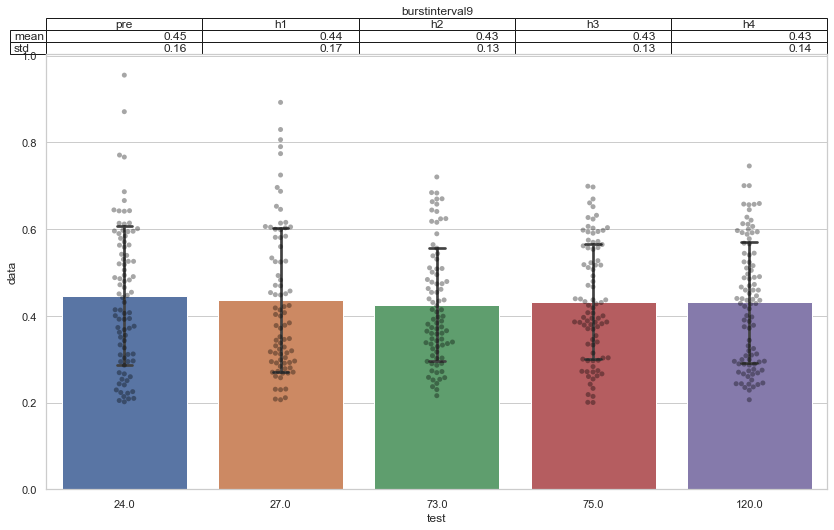

<Figure size 432x288 with 0 Axes>

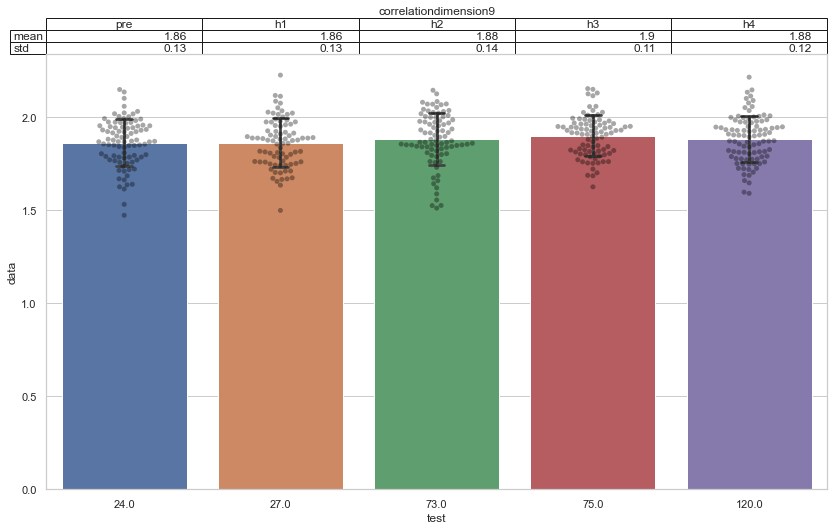

<Figure size 432x288 with 0 Axes>

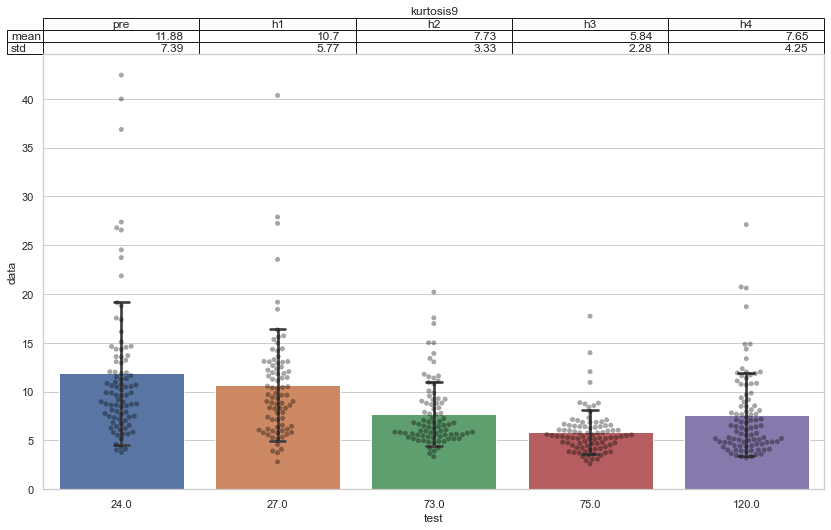

<Figure size 432x288 with 0 Axes>

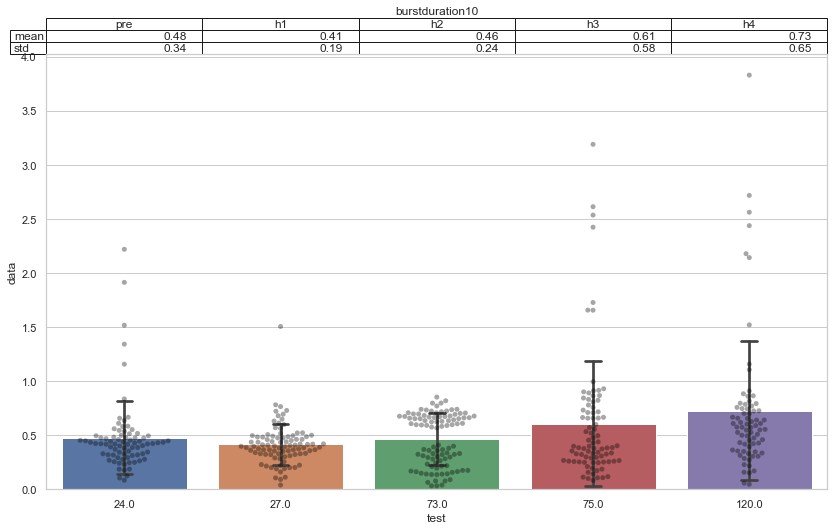

<Figure size 432x288 with 0 Axes>

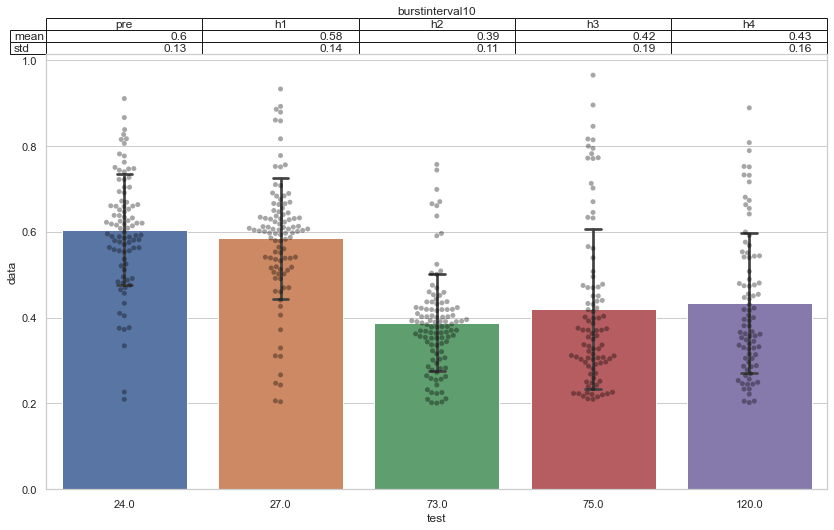

<Figure size 432x288 with 0 Axes>

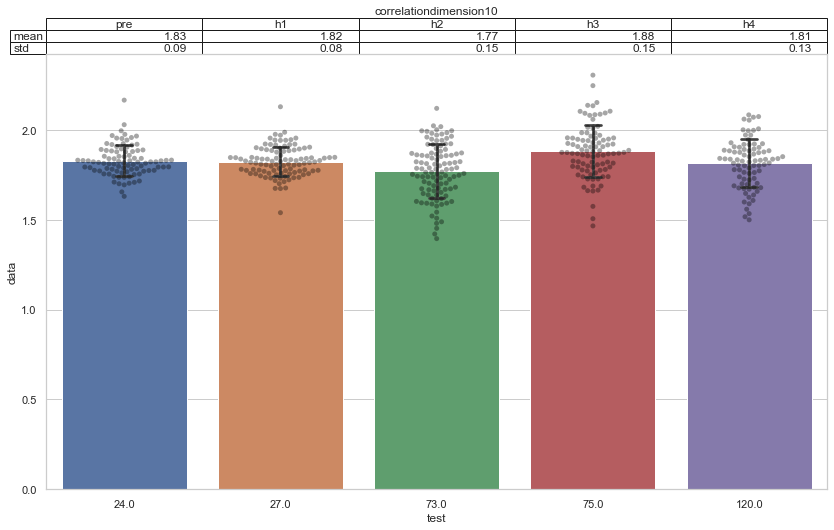

<Figure size 432x288 with 0 Axes>

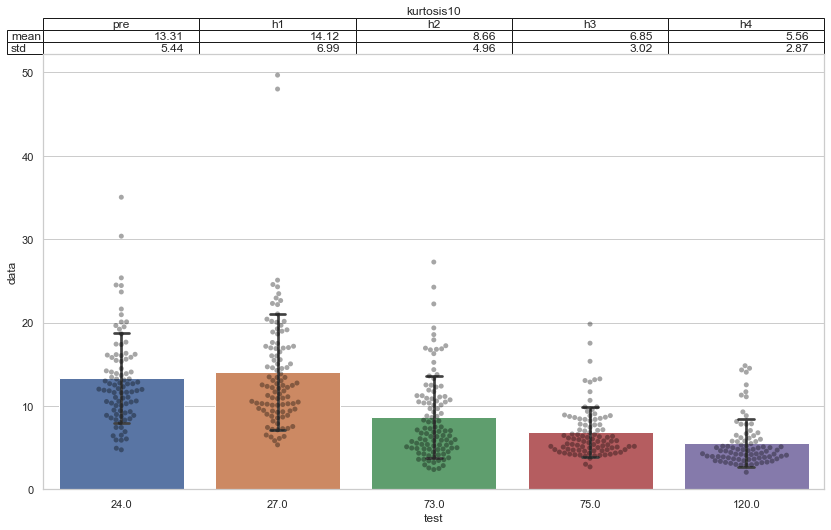

<Figure size 432x288 with 0 Axes>

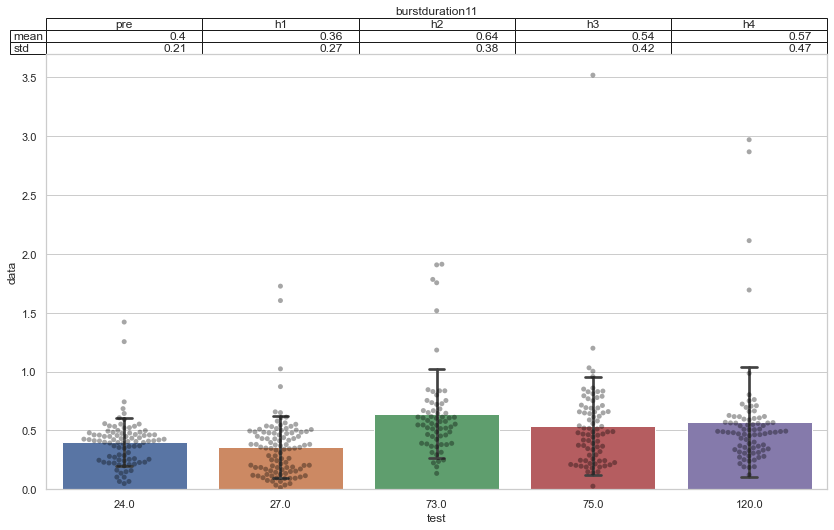

<Figure size 432x288 with 0 Axes>

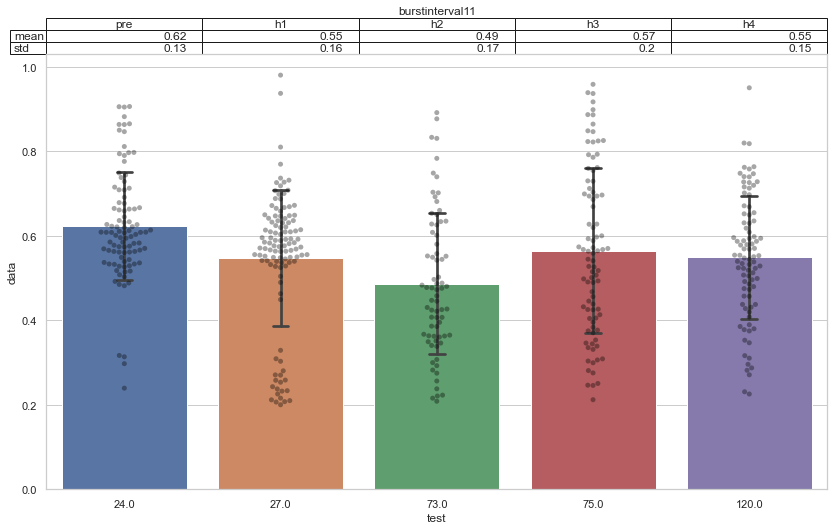

<Figure size 432x288 with 0 Axes>

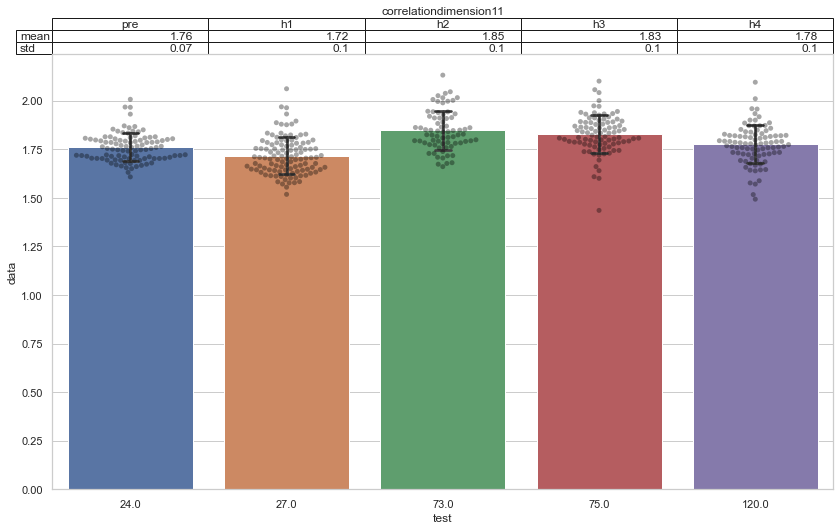

<Figure size 432x288 with 0 Axes>

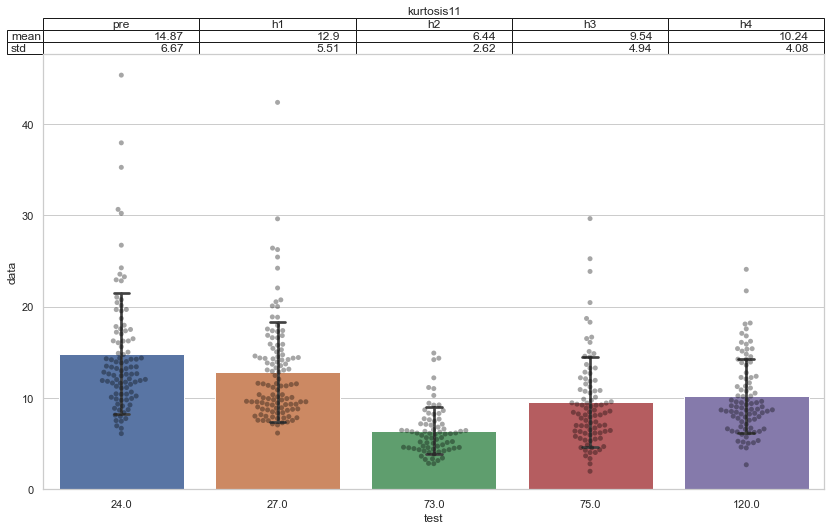

<Figure size 432x288 with 0 Axes>

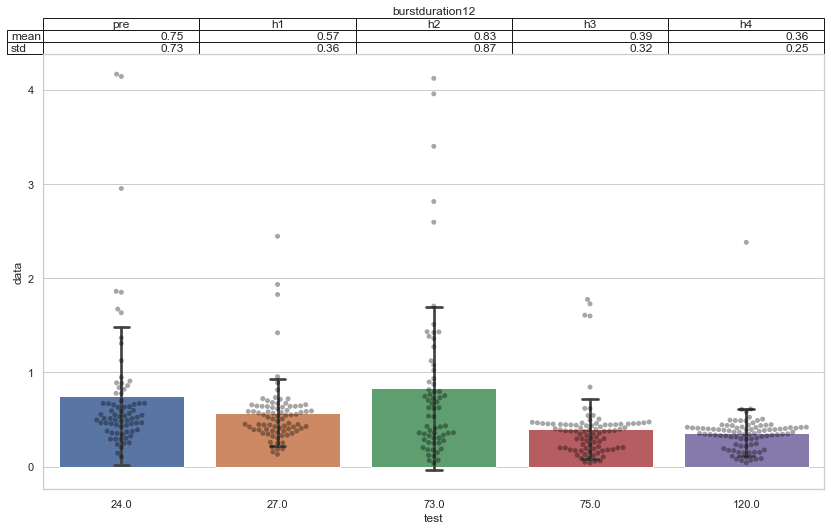

<Figure size 432x288 with 0 Axes>

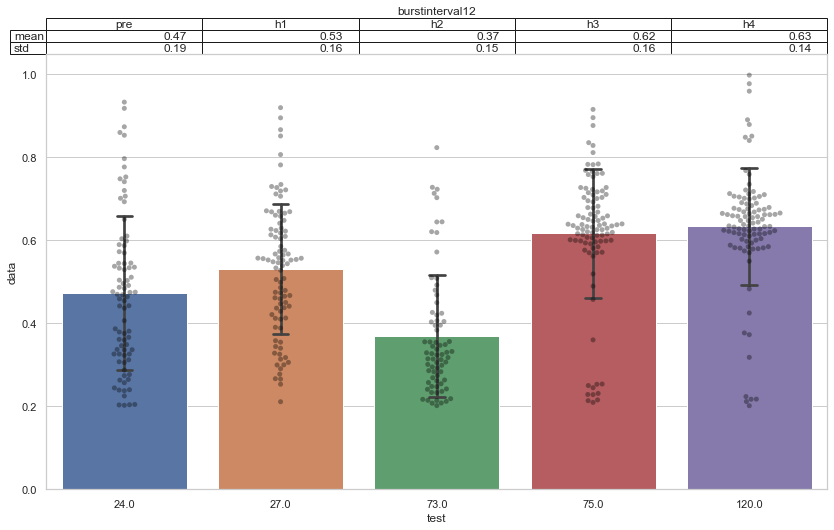

<Figure size 432x288 with 0 Axes>

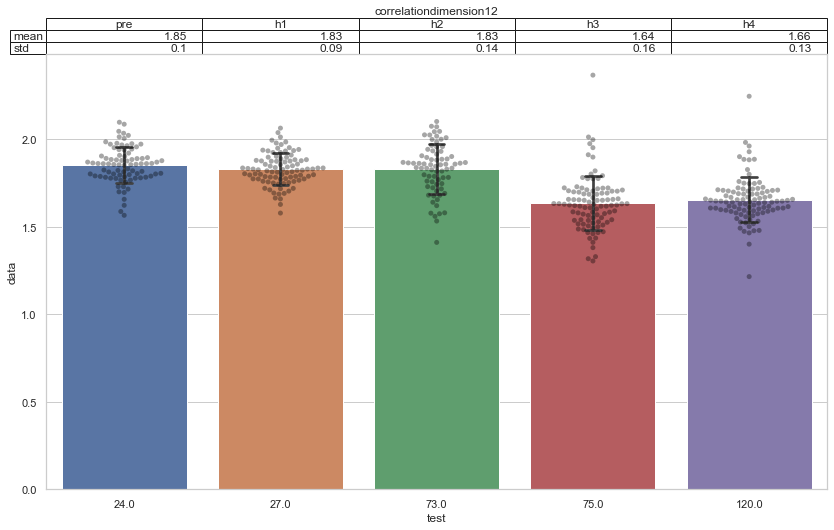

<Figure size 432x288 with 0 Axes>

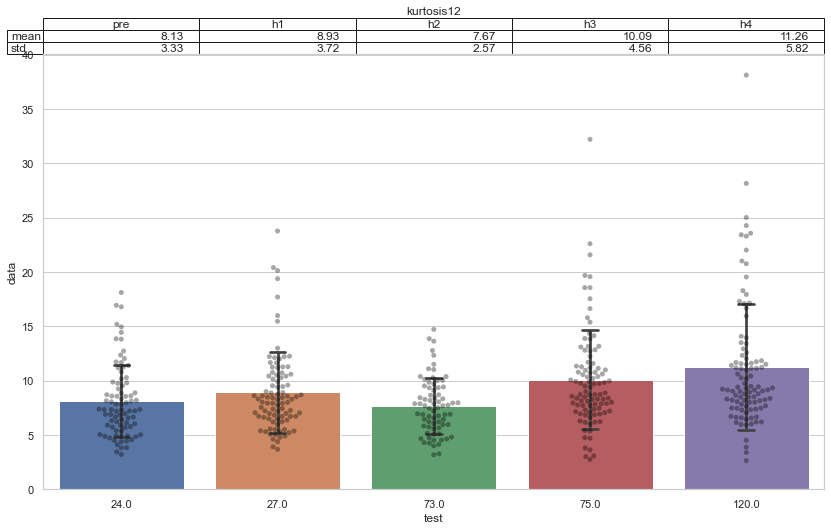

<Figure size 432x288 with 0 Axes>

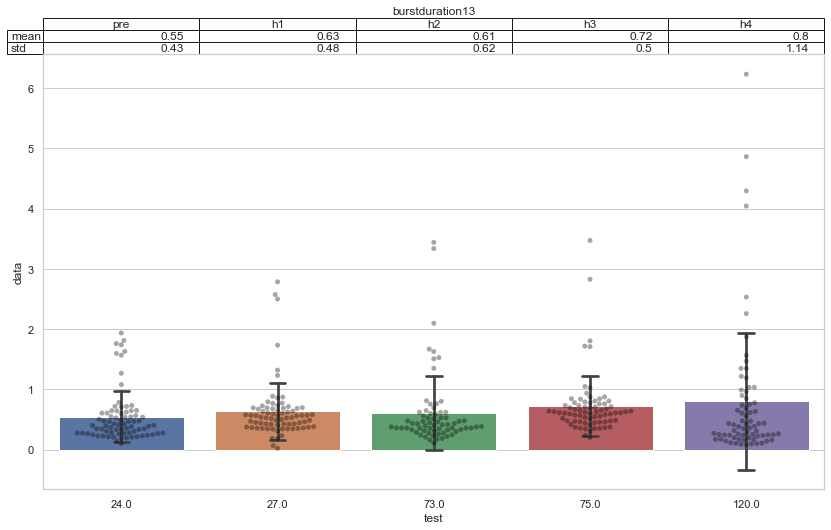

<Figure size 432x288 with 0 Axes>

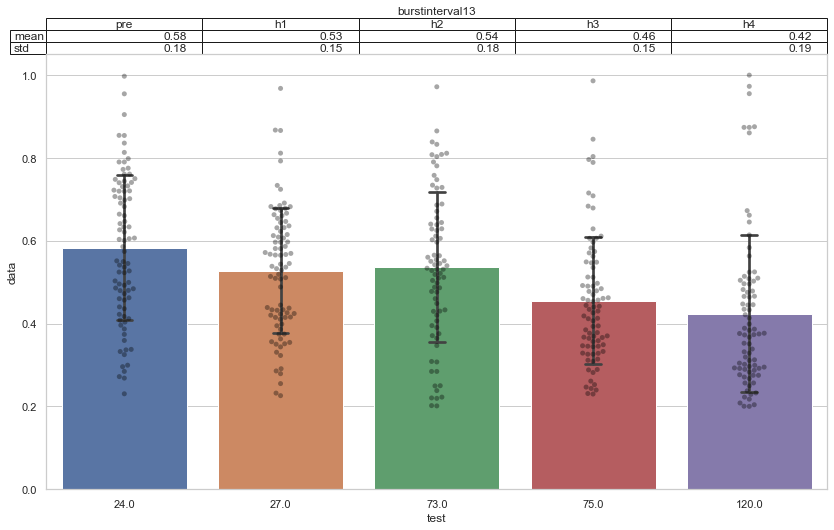

<Figure size 432x288 with 0 Axes>

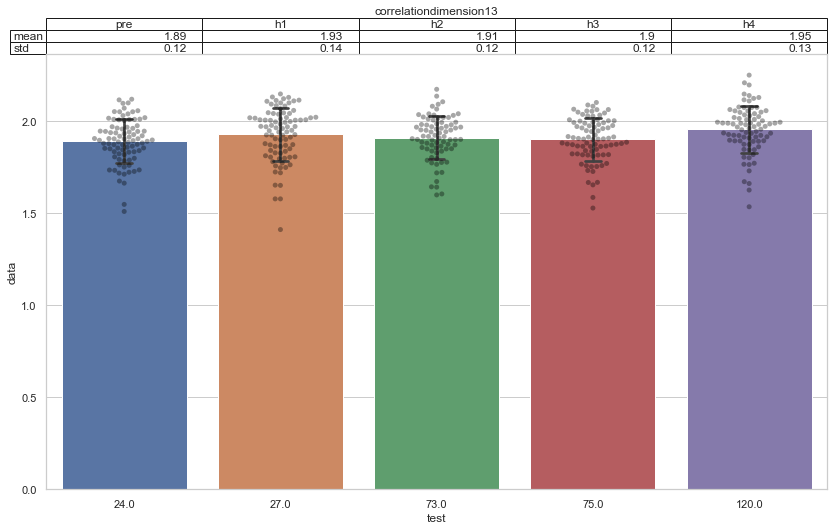

<Figure size 432x288 with 0 Axes>

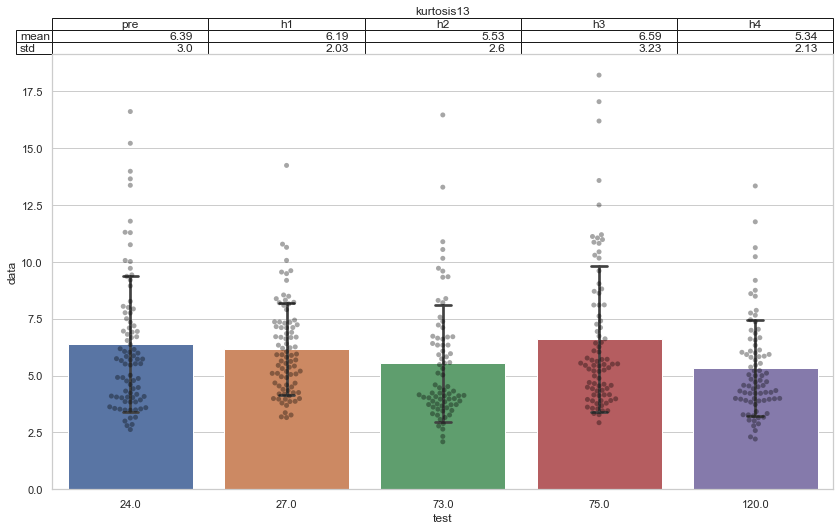

<Figure size 432x288 with 0 Axes>

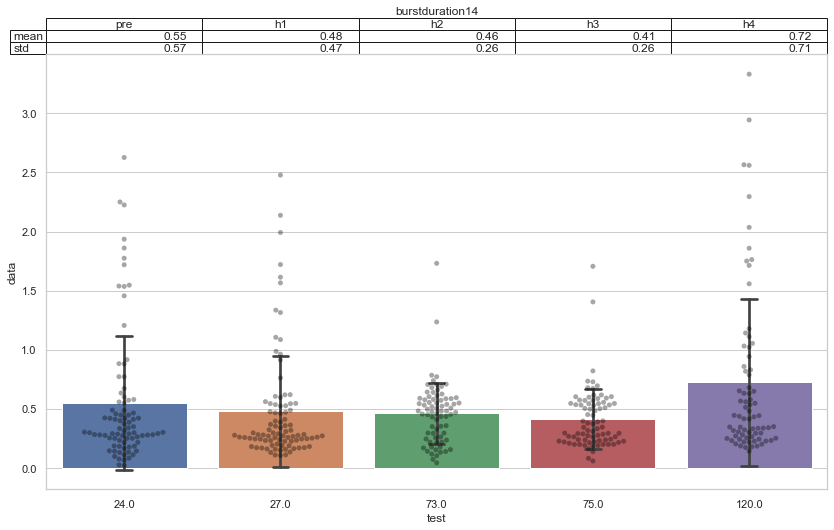

<Figure size 432x288 with 0 Axes>

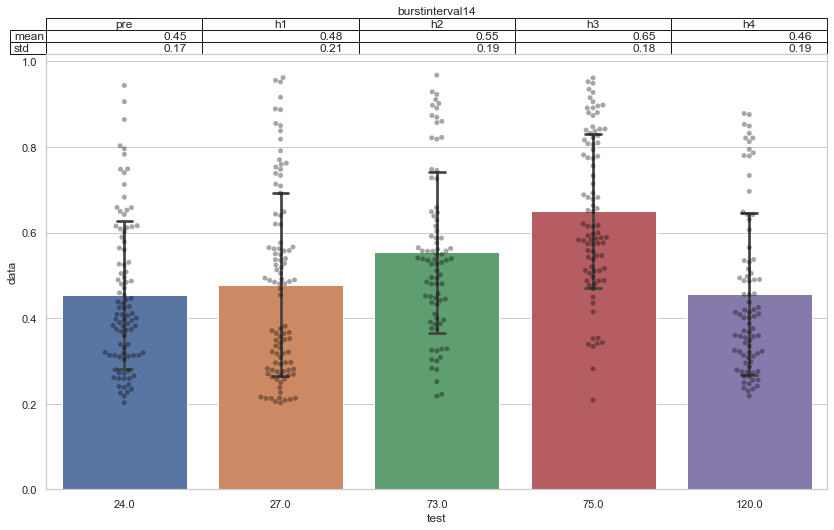

<Figure size 432x288 with 0 Axes>

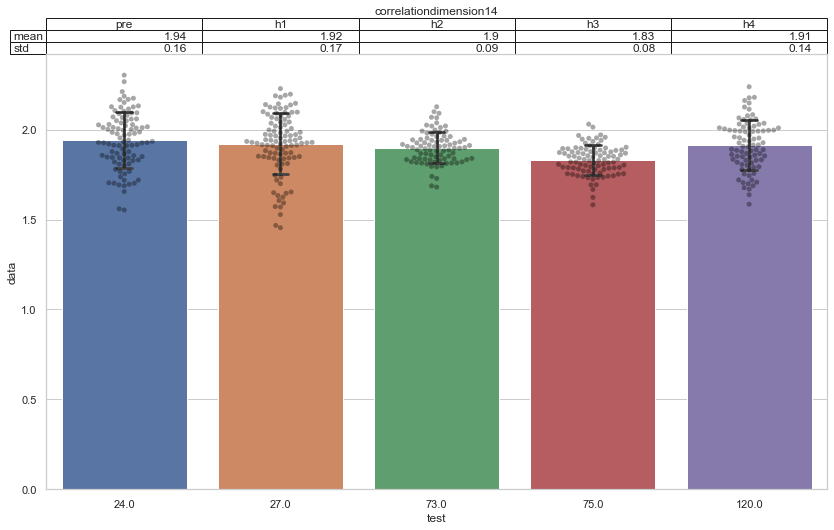

<Figure size 432x288 with 0 Axes>

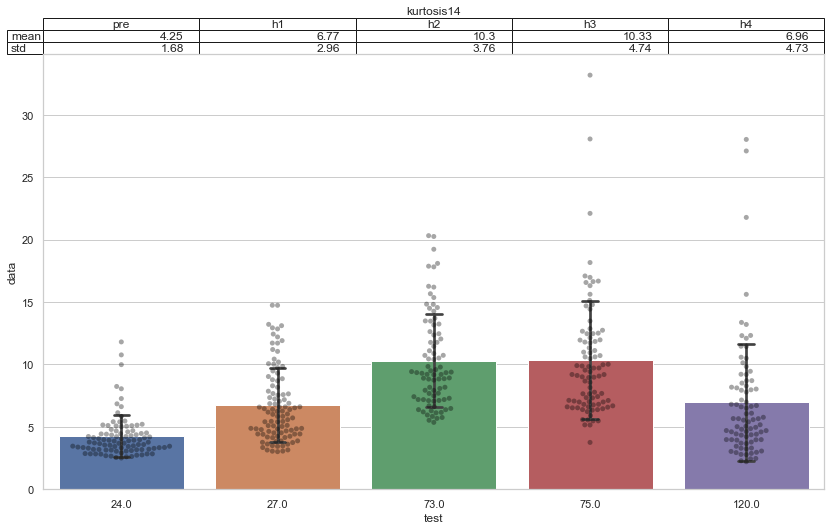

<Figure size 432x288 with 0 Axes>

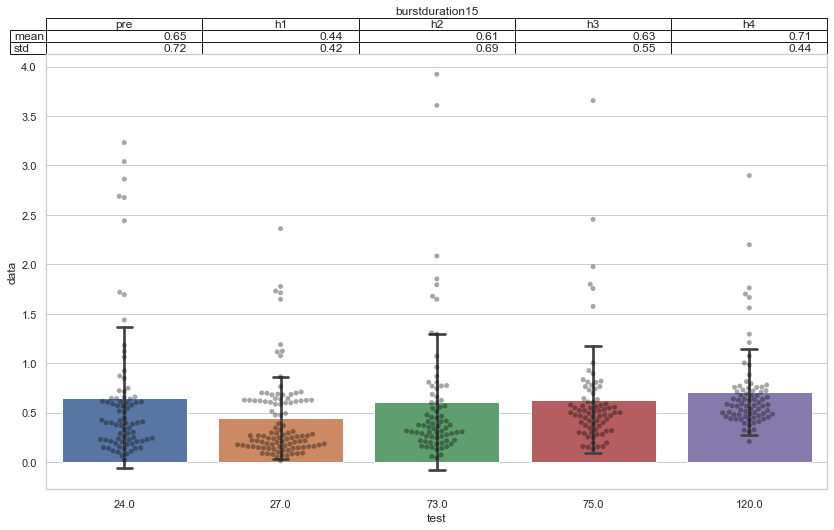

<Figure size 432x288 with 0 Axes>

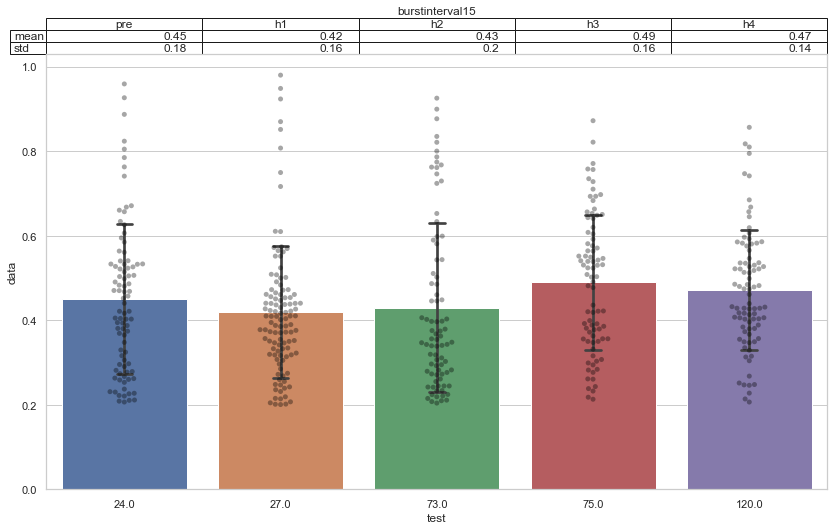

<Figure size 432x288 with 0 Axes>

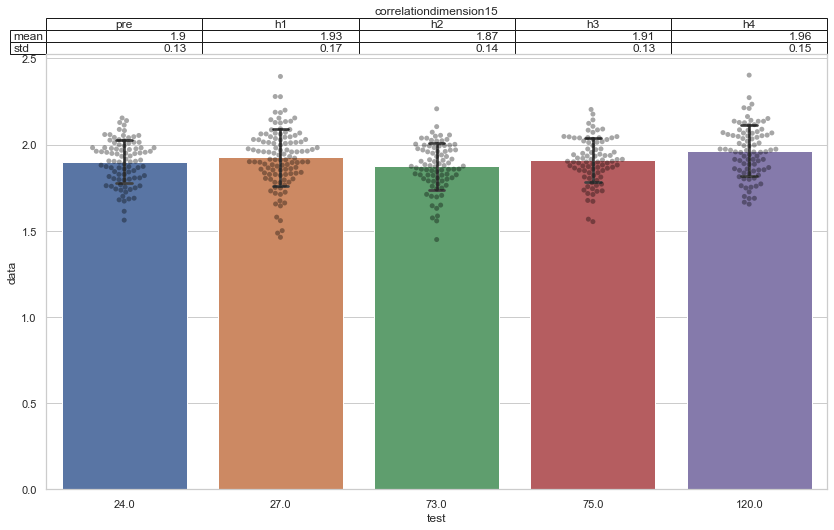

<Figure size 432x288 with 0 Axes>

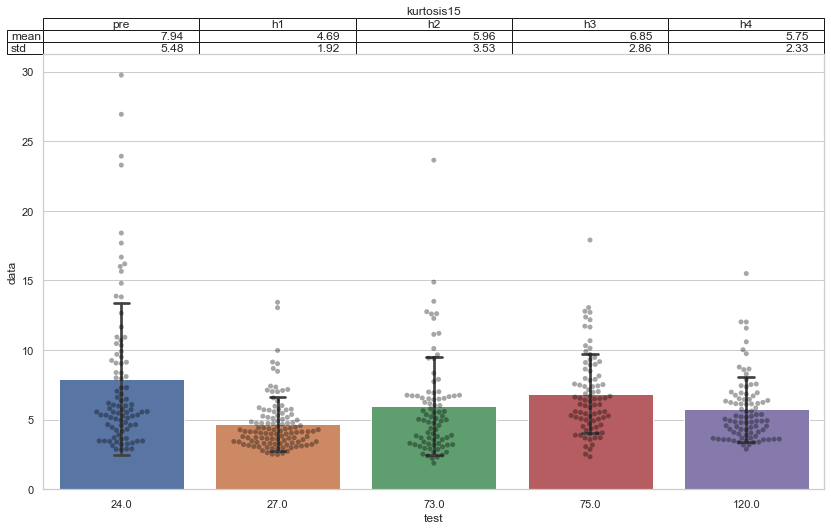

<Figure size 432x288 with 0 Axes>

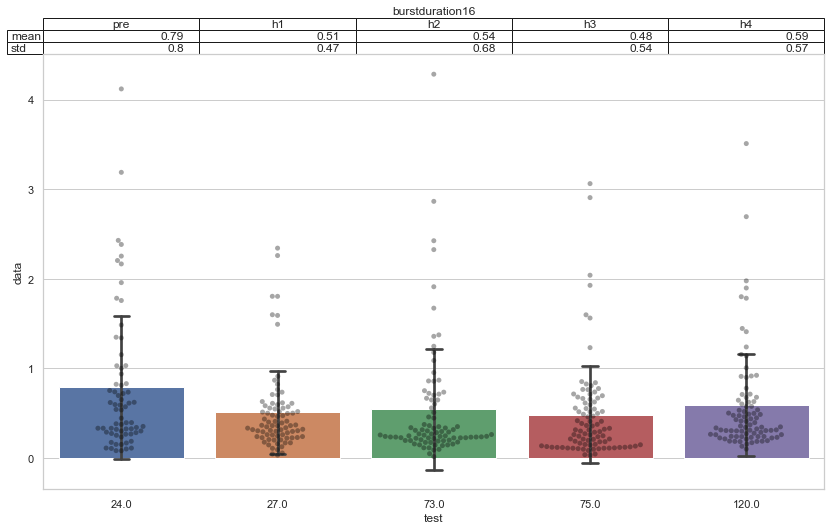

<Figure size 432x288 with 0 Axes>

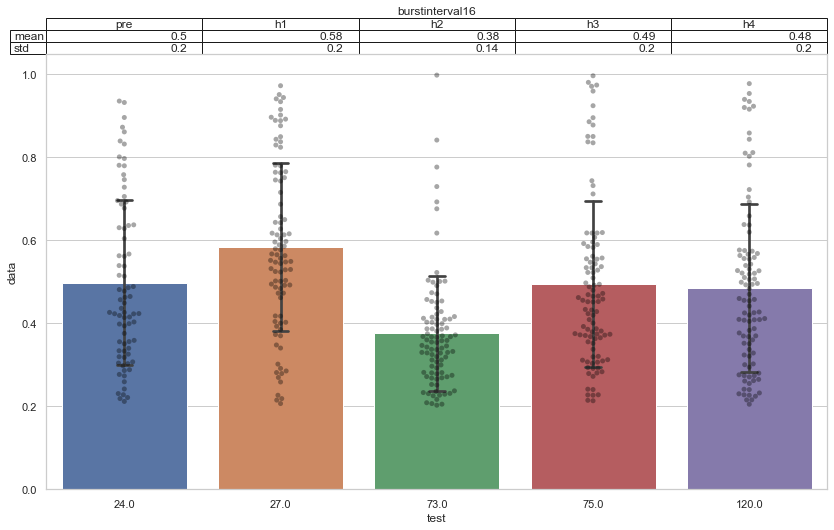

<Figure size 432x288 with 0 Axes>

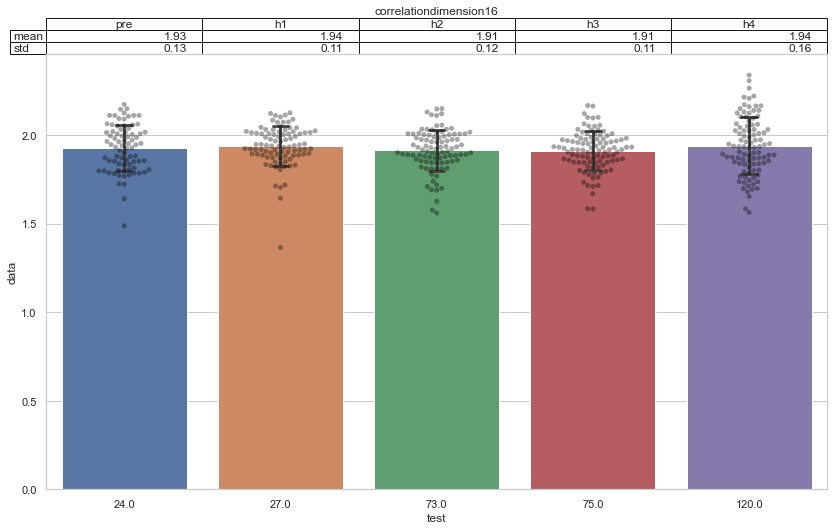

<Figure size 432x288 with 0 Axes>

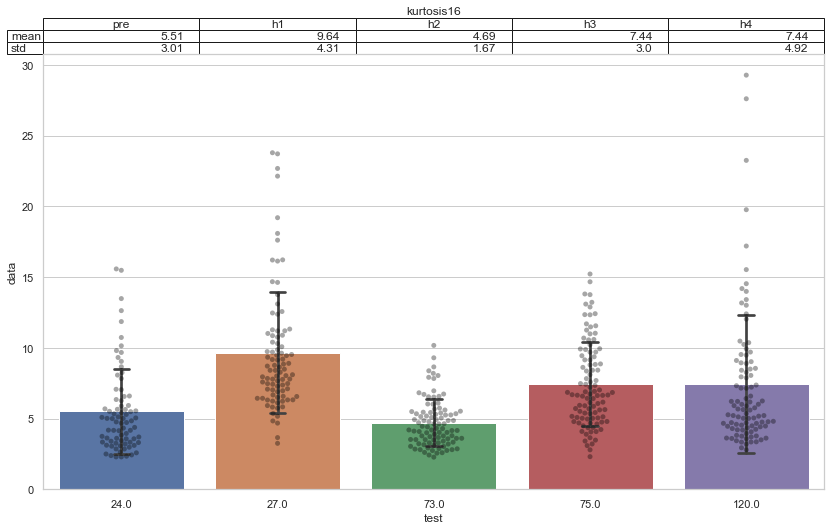

<Figure size 432x288 with 0 Axes>

In [37]:
df = pd.DataFrame()
data=[]
index=['burstduration','burstinterval','correlationdimension','kurtosis']
rows=["mean","std"]
for i in range(16):
    Data = pd.DataFrame()
    for filename in listdir(mypath):  
        fullpath = join(mypath,filename)
        name=fullpath.split("_")[testorder]   
        for t in test:
            if ((testname+str(t)) in name):
                data = pd.read_excel(fullpath, sheet_name=None)
                sheet = pd.ExcelFile(fullpath)               

                le=len(getburst(data)[4][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,0),getburst(data)[4][i]])
                
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                le=len(getburst(data)[5][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,1),getburst(data)[5][i]])
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                le=len(get_corr(data)[2][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,2),get_corr(data)[2][i]])
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                le=len(get_ku(data)[2][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,3),get_ku(data)[2][i]])
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                
    for k in range(4):                         
        fig, ax = plt.subplots(figsize = (14,8))
        sns.set(style="whitegrid")

        sns.barplot(x="test", y="data", data=Data[Data['pca'].isin([i])&Data['part'].isin([k])], capsize=.1, ci="sd")
        sns.swarmplot(x="test", y="data", data=Data[Data['pca'].isin([i])&Data['part'].isin([k])], color="0", alpha=.35)
        
        df=Data[Data['pca'].isin([i])&Data['part'].isin([k])]
        m=df.groupby(['test']).mean()['data']
        Mean = [round(item, 2) for item in m]
        s=df.groupby(['test']).std()['data']
        Std = [round(item, 2) for item in s]
        arr=[Mean,Std]
        
        plt.title(label=index[k]+str(i+1), 
                  fontweight=10, 
                  pad='40.0')

        the_table = plt.table(cellText=arr,
                          rowLabels=rows,
                          colLabels=label,
                          loc='top')
        fig.savefig(folder+'_bar_'+index[k]+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
        plt.show()
        plt.figure().clear()